<center>
    <h1>GROUP 11</h1>
    <h3>Data Wrangling</h3>
</center>

<h3>Group Members</h3>
Onte, Michael Jethro M.<br>
Sunga, Jullianne Christille N.<br>
Villegas, Renz Justine L.<br>

<h1>Importing Required Libraries</h1>
This file contains all the libraries that are required for the project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import re

''' imports for data preprocessing '''
from IPython import get_ipython
import os





<h2>Loading and Viewing Data</h2>
The first step of data analysis.

This notebook is used to download the dataset from kaggle and save it to the notebook directory

In [2]:
# %%script echo skipping
# temporary skip this cell (takes a long time to run)

# installs the kaggle API
%pip install kaggle

# set the api token
# WARNING: THIS IS MY PERSONAL API TOKEN, DO NOT SHARE TO OTHERS
os.environ['KAGGLE_USERNAME'] = "renzvillegas"
os.environ['KAGGLE_KEY'] = "5ea771b8f7b2bd3e6cbc9f37d834f1d9"

# get the datasets from kaggle using this dataset: dhanushbommavaram/laptop-dataset in the notebook directory
get_ipython().system('kaggle datasets download -d dhanushbommavaram/laptop-dataset --force')


Note: you may need to restart the kernel to use updated packages.


  0%|          | 0.00/266k [00:00<?, ?B/s]
100%|██████████| 266k/266k [00:00<00:00, 489kB/s]
100%|██████████| 266k/266k [00:00<00:00, 456kB/s]


The dataset downloaded from kaggle is a zip file. We need to unzip it first to get the csv file.

In [3]:
# %%script echo skipping
# temporary skip this cell (takes a long time to run)

# unzip the dataset
import zipfile

with zipfile.ZipFile("laptop-dataset.zip","r") as zip_ref:
    zip_ref.extractall("./")


 This dataset contains non-utf characters, so we need to remove them first before we can use it

In [4]:

# remove non utf-8 characters
def remove_non_utf8(text):
    return re.sub(r'[^\x00-\x7F]+',' ', text)


# open file
with open('complete laptop data0.csv', 'r', encoding='latin1') as f:
    data = f.readlines()

    # remove non utf-8 characters
    data = [remove_non_utf8(x) for x in data]

    # save to csv
    with open('complete laptop data0_utf.csv', 'w') as f:
        f.writelines(data)

# read csv
df = pd.read_csv('complete laptop data0_utf.csv')


Copy the dataset and show the shape

In [5]:
dfc = df.copy()
dfc.shape

(984, 98)

Get the first 5 rows

In [6]:
dfc.head()

,Unnamed: 0,link,name,user rating,Price,Sales Package,Model Number,Part Number,Model Name,Series,...,Security Chip,Inbuilt 4G LTE,Cloud Storage,S-video,Dock Port,Firewire Port,RJ11,Read/Write Speed,EMMC Storage Capacity,Optane Memory
0,0,https://www.flipkart.com/asus-rog-strix-scar-1...,ASUS ROG Strix SCAR 17 Core i9 12th Gen - (32 ...,5.0,"?2,34,990","Laptop, Power Adaptor, User Guide, Warranty Do...",G733ZW-LL139WS,90NR08G2-M007S0,G733ZW-LL139WS,ROG Strix SCAR 17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,https://www.flipkart.com/asus-rog-strix-scar-1...,ASUS ROG Strix SCAR 15 Core i9 12th Gen - (32 ...,NaN,"?2,29,990","Laptop, Power Adaptor, User Guide, Warranty Do...",G533ZW-LN136WS,90NR0872-M007L0,G533ZW-LN136WS,ROG Strix SCAR 15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,https://www.flipkart.com/hp-victus-ryzen-7-oct...,HP Victus Ryzen 7 Octa Core 5800H - (16 GB/512...,NaN,"?1,04,091","Laptop, battery, adapter, cables and user manuals",16-e0351AX,552X1PA#ACJ,16-e0351AX,Victus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,https://www.flipkart.com/lenovo-ideapad-gaming...,Lenovo IdeaPad Gaming 3i Ryzen 7 Octa Core R7-...,NaN,"?87,717","Laptop, Power Adaptor, User Guide, Warranty Do...",15ACH6,82K201RSIN,IdeaPad Gaming 3,IdeaPad Gaming 3i,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,https://www.flipkart.com/lenovo-yoga-slim-7-co...,Lenovo Yoga Slim 7 Core i5 11th Gen - (16 GB/5...,NaN,"?75,990","Laptop, Adaptor",82A300MBIN,1LS2B001653,Yoga Slim 7 14ITL05,Yoga Slim 7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Get the columns

In [7]:
dfc.columns

Index(['Unnamed: 0', 'link', 'name', 'user rating', 'Price', 'Sales Package',
       'Model Number', 'Part Number', 'Model Name', 'Series', 'Color', 'Type',
       'Suitable For', 'Power Supply', 'Battery Cell', 'MS Office Provided',
       'Dedicated Graphic Memory Type', 'Dedicated Graphic Memory Capacity',
       'Processor Brand', 'Processor Name', 'Processor Generation', 'SSD',
       'SSD Capacity', 'RAM', 'RAM Type', 'Processor Variant', 'Clock Speed',
       'Expandable Memory', 'Cache', 'Graphic Processor', 'Number of Cores',
       'OS Architecture', 'Operating System', 'Supported Operating System',
       'Mic In', 'USB Port', 'HDMI Port', 'Touchscreen', 'Screen Size',
       'Screen Resolution', 'Screen Type', 'Speakers', 'Internal Mic',
       'Sound Properties', 'Wireless LAN', 'Bluetooth', 'Dimensions', 'Weight',
       'Disk Drive', 'Finger Print Sensor', 'Keyboard', 'Backlit Keyboard',
       'Additional Features', 'Warranty Summary', 'Warranty Service Type',
       'C

<h1>Data Wrangling</h1>
Get the dataset information

In [8]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 98 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         984 non-null    int64  
 1   link                               984 non-null    object 
 2   name                               984 non-null    object 
 3   user rating                        690 non-null    float64
 4   Price                              984 non-null    object 
 5   Sales Package                      984 non-null    object 
 6   Model Number                       984 non-null    object 
 7   Part Number                        984 non-null    object 
 8   Model Name                         709 non-null    object 
 9   Series                             787 non-null    object 
 10  Color                              984 non-null    object 
 11  Type                               984 non-null    object 

Check for the missing values

In [9]:
dfc.isna().sum()

Unnamed: 0                 0
link                       0
name                       0
user rating              294
Price                      0
                        ... 
Firewire Port            950
RJ11                     943
Read/Write Speed         980
EMMC Storage Capacity    960
Optane Memory            978
Length: 98, dtype: int64

Check all the columns that was greater than 20% of its data are missing

In [10]:
nulled_10 = dfc.loc[
     :, 
     dfc.drop(
        dfc.dropna(
            axis=1, 
            thresh=df.shape[0] * (1 - 0.20), 
            inplace=False), 
        axis=1)
        .columns].columns

# exclude columns from nulled_10
columns_needed = [
        'name', 'Price', 'Model Number',
        'Color', 'Type',
        'Suitable For', 'MS Office Provided',
        'Dedicated Graphic Memory Capacity',
        'Processor Brand', 'Processor Name', 'Processor Variant',
        'Clock Speed', 'Cache',  'Number of Cores', 
        'Graphic Processor',
        'SSD Capacity', 
        'HDD Capacity',
        'RAM', 'RAM Type', 
        'Operating System', 
        'Touchscreen', 'Screen Size', 'Screen Resolution', 'Screen Type', 'Brightness',
        'Wireless LAN', 'Bluetooth', 
        'Weight', 'Keyboard', 'Dimensions',
        'Backlit Keyboard', 
        'Warranty Summary',
        'Web Camera',
        'Refresh Rate']

(nulled_10 := [x for x in nulled_10 if x not in columns_needed])

['user rating',
 'Model Name',
 'Series',
 'Power Supply',
 'Battery Cell',
 'Dedicated Graphic Memory Type',
 'Processor Generation',
 'Expandable Memory',
 'Supported Operating System',
 'Sound Properties',
 'Finger Print Sensor',
 'Additional Features',
 'Ethernet',
 'Pointer Device',
 'Included Software',
 'Battery Backup',
 'Chipset',
 'Memory Slots',
 'RAM Frequency',
 'RJ45',
 'Sound Chip',
 'Laptop Bag',
 'Other Accessories',
 'International Warranty',
 'Wireless WAN',
 'Recovery Options',
 'RPM',
 'Hardware Interface',
 'Face Recognition',
 'System Architecture',
 'Antivirus',
 'Multi Card Slot',
 'Lock Port',
 'NFC Support',
 'Stylus Included',
 'TGP',
 'VGA Port',
 'Color Gamut',
 'Security Chip',
 'Inbuilt 4G LTE',
 'Cloud Storage',
 'S-video',
 'Dock Port',
 'Firewire Port',
 'RJ11',
 'Read/Write Speed',
 'EMMC Storage Capacity',
 'Optane Memory']

Remove all the useless columns

In [11]:
# remove columns with more than 10% null values

# remove "HDD Capacity" and "Refresh Rate" columns from null
nulled_10
dfc.drop(nulled_10, axis=1, inplace=True)

print(f'Size of dataset after removing useless columns: {"x".join(map(str, dfc.shape))}')

# drop all the columns not included in columns_needed
dfc.drop(
    dfc.drop(columns_needed, axis=1).columns, 
    axis=1, 
    inplace=True)


dfc.isna().sum()

Size of dataset after removing useless columns: 984x50


name                                   0
Price                                  0
Model Number                           0
Color                                  0
Type                                   0
Suitable For                           0
MS Office Provided                     0
Dedicated Graphic Memory Capacity    674
Processor Brand                        0
Processor Name                         0
SSD Capacity                         108
RAM                                    0
RAM Type                               0
Processor Variant                    123
Clock Speed                          123
Cache                                223
Graphic Processor                     20
Number of Cores                      260
Operating System                       0
Touchscreen                            0
Screen Size                            0
Screen Resolution                      0
Screen Type                          101
Wireless LAN                         116
Bluetooth       

<h2>Fixing the Data</h2>
Function that will be used

In [12]:
def storageParse(x:str):
    if x is np.nan:
        return x
    if 'TB' in x:
        return float(x.split('TB')[0].strip()) * 1024
    elif 'GB' in x:
        return float(x.split('GB')[0].strip())
    else:
        return np.nan
    
def parsePixels(x:str):
    if x is np.nan:
        return x

    result = list(map(int, re.findall(r'\d+', x)))

    if len(result) == 2:
        return result[0] * result[1]
    else:
        if 1080 in result:
            return 1080 * 1920
        elif 768 in result:
            return 768 * 1366
        elif 1200 in result:
            return 1200 * 1920
        elif 2160 in result:
            return 2160 * 3840
        
def parseScreenSize(x:str):
    if x is np.nan:
        return x

    # get the dimensions in cm "35.56 cm (14 Inch)" -> "35.56"
    return float(x.capitalize().split('cm')[0].strip())


def parseProcessorVariant(x:str):
    if x is np.nan:
        return x
    
    pattern = r"([A-Z,0-9]?\d+[A-Z,0-9][A-Z,0-9]?)"
    
    match = re.search(pattern,x)

    if match:
        return match.group(1)
    else:
        return x

    

def parseBluetoot(x:str):
    if x is np.nan:
        return x
    
    x = x.lower()

    if x.find('available') != -1:
        return np.nan

    if x.find('bt') != -1:
        return float(x.split('bt')[1].strip())
    elif x.find('v') != -1:
        return float(x.split('v')[1].strip())
    else:
        return np.nan
    
    
    
def parseWeight(x:str):
    if x is np.nan:
        return x
    
    result = list(map(float, re.findall(r'\d+\.?\d*', x)))

    if len(result) == 1:
        return result[0]
    else:
        return np.nan
   
    
def parseClockSpeed(x:str):
    if x is np.nan:
        return x
    
    # Gets the clock turbo speed in GHz
    match = re.search(r"(?:turbo|upto|with).*?(\d+\.?\d*)\s*ghz", x.replace(' ', '').lower())

    # Gets the clock speed 
    match1 = re.search(r"(\d+\.?\d*)", x.replace(' ', '').lower())

    if match:
        return float(match.group(1))
    elif match1:
        return float(match1.group(1))
    else:
        return np.nan
    

def parseCache(x:str):
    if x is np.nan:
        return x
    
    # Gets the clock turbo speed in GHz
    match = re.search(r"(\d+\.?\d*)\s*mb", x.replace(' ', '').lower())

    # Gets the clock speed 
    match1 = re.search(r"(\d+\.?\d*)", x.replace(' ', '').lower())

    if match:
        return float(match.group(1))
    elif match1:
        return float(match1.group(1))
    else:
        return np.nan

def parsePx(x:str):
    if x is np.nan:
        return x
    
    match = re.search(r"(\d+\.?\d*)\s*(?:mp|megapixel|megapixels)", x.lower())
    
    if match:
        return f'{float(match.group(1)):0.2f}MP'
    else:
        return x



def parseDimensions(x:str):
    if x is np.nan:
        return x

    # get the dimensions in cm "36.02 x 23.49 x 1.99 mm" -> "36.02 x 23.49 x 1.99"

    x = x.lower()
    in_cm = x.find('cm') != -1

    if '*' in x:
        result = x.split('*')
    elif '/' in x:
        result = x.split('/')
    elif 'x' in x:
        result = x.split('x')
    else:
        return np.nan
    
    result = result[:3]


    if len(result) >= 3:
        #check if the first element lower than the second element and the third element, if it is, then swap the first element with the second element
        result = list(map(lambda x: float(re.findall(r'\d+\.?\d*', x)[0]), result))

        if result[0] < result[2]:
            result[0], result[2] = result[2], result[0]
        elif result[1] < result[2]:
            result[1], result[2] = result[2], result[1]
        

        for i in range(2):
            if in_cm:
                result[i] = result[i] * 10
            else:
                if 5 < result[i] < 50:
                    result[i] = result[i] * 10

        if in_cm:
            result[2] = result[2] * 10
        else:
            if 0.5 < result[2] < 3:
                result[2] = result[2] * 10
            if 100 < result[2] < 300:
                result[2] = result[2] / 10


        return f"{result[0]:.2f} x {result[1]:.2f} x {result[2]:.2f} mm"
    else:
        return f"{result[0]}"
    
# get all the backlit keyboard with "rgb" in it store in x
def parseBacklight(text):
    if text is np.nan:
        return 'Non-Backlit'

    text = text.lower()
    
    if text.find('backlit'):
        if text.find('rgb'):
            if re.compile(r'\b(?:(\d+)\s*(?:-| )\s*zone\s*)?(?:rgb)', re.IGNORECASE).findall(text):
                return '4-Zone RGB'
            else:
                return 'RGB'
        else:
            return 'Single-Color'
    else:
        return 'Non-Backlit'


    

<h3>Price</h3>
Parse the price, from INR to PHP

In [13]:
# convert rupees to php
%pip install currencyconverter
from currency_converter import CurrencyConverter

c = CurrencyConverter().convert(1, 'INR', 'PHP') # for real time conversion use this
# c = 0.67 # for static conversion use this

dfc['Price'] = round(dfc['Price'].str.replace(',', '').str.lstrip('?').astype(float) * c, 2)


x = dfc['Price'].values

Note: you may need to restart the kernel to use updated packages.


<h3>Screen Resolution</h3>
Parse the web Screen Resolutions, the result will be in pixels.

In [14]:
# Split "Dimensions" to "Height" and "Width" then multiply them to get the total pixels
dfc['Screen Resolution'] = dfc['Screen Resolution'].apply(parsePixels)

# check if "Screen Resolution" has NaN values
print("Check for null values for Screen Resolution: ", dfc['Screen Resolution'].isna().sum())

# remove NaN values from "Screen Size"
dfc.dropna(subset=['Screen Resolution'], inplace=True)

# final check for null values
print(f"Unique values for Screen Resolution: {dfc['Screen Resolution'].unique()}")
print("Final null values for Screen Resolution: ", dfc['Screen Resolution'].isna().sum())

# get current rows size
print(f"Current rows size: {dfc.shape[0]}")


Check for null values for Screen Resolution:  1
Unique values for Screen Resolution: [3686400. 2073600. 2304000. 3110400. 5184000.  777600. 1049088. 8294400.
 9216000. 3136000. 4096000. 2457600.  921600. 6000000. 2138400. 5939136.
 2084400. 7464960.]
Final null values for Screen Resolution:  0
Current rows size: 983


<h3>Screen Size</h3>
Parse Screen Size, results will be in diagonal (cm)

In [15]:
# Get the screen size in cm
dfc['Screen Size'] = dfc['Screen Size'].apply(parseScreenSize)

# check if "Dimensions" has NaN values
print(f"Unique values for Screen Size: {dfc['Screen Size'].unique()}")
print("Null values for Screen Size: ", dfc['Screen Size'].isna().sum())

# get current rows size
print(f"Current rows size: {dfc.shape[0]}")

Unique values for Screen Size: [43.94 39.62 40.89 35.56 33.78 34.04 35.81 42.16 29.46 40.64 38.   36.12
 38.1  34.29 30.48 36.07 33.02 38.86 37.85 36.83 34.54]
Null values for Screen Size:  0
Current rows size: 983


<h3>Refresh Rate</h3>
Parse the Refresh Rate, results will be in numerical value, in Hz

In [16]:
x = pd.DataFrame(dfc['Screen Size'].value_counts())

print("Initial null values for Refresh Rate: ", dfc['Refresh Rate'].isna().sum())
'''
# get Screen Type with "Hz" in it and show the value
x = dfc.loc[dfc['Screen Type'].str.contains('Hz', case=False, na=False), ['Screen Type', 'Refresh Rate']]
'''
print(f'There are {x.shape[0]} rows with "Hz" in Screen Type column')

# get the number before "Hz" and convert it to float, only for Refresh Rate with NaN values
dfc.loc[dfc['Refresh Rate'].isna(), 'Refresh Rate'] = dfc.loc[dfc['Refresh Rate'].isna(), 'Screen Type'].str.replace(' ', '').str.extract(r'(\d+\.?\d*)Hz', expand=False).astype(float)
'''
# get name with "Hz" in it and show the value
x = dfc.loc[dfc['name'].str.contains('Hz', case=False, na=False), ['name', 'Refresh Rate']]
'''
print(f'There are {x.shape[0]} rows with "Hz" in "name" column')

# get the number before "Hz" and convert it to float, only for Refresh Rate with NaN values
dfc.loc[dfc['Refresh Rate'].isna(), 'Refresh Rate'] = dfc.loc[dfc['Refresh Rate'].isna(), 'name'].str.replace(' ', '').str.extract(r'(\d+\.?\d*)Hz', expand=False).astype(float)

# check if "Refresh Rate" has NaN values
print("Null values for  Refresh Rate after filling up from 'name' and 'Screen Type': ", dfc['Refresh Rate'].isna().sum())

# set the "Refresh Rate" to 60 if it has NaN values
dfc.loc[dfc['Refresh Rate'].isna(), 'Refresh Rate'] = 60.0

# get all the non digit values in "Refresh Rate" 
dfc['Refresh Rate'] = dfc['Refresh Rate'].astype(str).str.extract(r'(\d+\.?\d*)', expand=False).astype(float)

# check if "Refresh Rate" has NaN values
print("Unique values for Refresh Rate: ", dfc['Refresh Rate'].unique())
print("Final null values for Refresh Rate: ", dfc['Refresh Rate'].isna().sum())

# get current rows size
print(f"Current rows size: {dfc.shape[0]}")


Initial null values for Refresh Rate:  826
There are 21 rows with "Hz" in Screen Type column
There are 21 rows with "Hz" in "name" column
Null values for  Refresh Rate after filling up from 'name' and 'Screen Type':  722
Unique values for Refresh Rate:  [ 60. 144. 120. 240. 165.  90. 360. 300.]
Final null values for Refresh Rate:  0
Current rows size: 983


<h3>Brightness</h3>
Parse the Brighness, results will be numerical, in nits

In [17]:
x = dfc['Screen Type'].value_counts()

# set the null values to the value extracted from "Screen Type" column
dfc.loc[dfc['Brightness'].isna(), 'Brightness'] = dfc.loc[dfc['Brightness'].isna(), 'Screen Type'].str.replace(' ', '').str.replace('1,', '1').str.extract(r'(\d+\.?\d*)nits', expand=False)

# check if "Brightness" has NaN values
print("Null values for Brightness: ", dfc['Brightness'].isna().sum())

# set the null values to the most frequent value
dfc.loc[dfc['Brightness'].isna(), 'Brightness'] = dfc['Brightness'].value_counts().index[0]

# get all the non digit values in "Brightness"
dfc['Brightness'] = dfc['Brightness'].astype(str).str.extract(r'(\d+\.?\d*)', expand=False).astype(float)

# check if "Brightness" has NaN values
print("Unique values for Brightness: ", dfc['Brightness'].unique())
print("Final null values for Brightness: ", dfc['Brightness'].isna().sum())


Null values for Brightness:  422
Unique values for Brightness:  [ 300.  250.  400.  600.  550.  200.  220.  340. 1000.  500.]
Final null values for Brightness:  0


<h3>Screen Type</h3>
Parse the Screen Type

In [18]:
x = dfc['Screen Type'].value_counts()

# set the common types based on the description
dfc.loc[dfc['Screen Type'].str.contains('IPS', case=False, na=False), 'Screen Type'] = 'IPS'
dfc.loc[dfc['Screen Type'].str.contains('TN', case=False, na=False), 'Screen Type'] = 'TN'
dfc.loc[dfc['Screen Type'].str.contains('WVA', case=False, na=False), 'Screen Type'] = 'WVA'
dfc.loc[dfc['Screen Type'].str.contains('SVA', case=False, na=False), 'Screen Type'] = 'SVA'
dfc.loc[dfc['Screen Type'].str.contains('OLED', case=False, na=False), 'Screen Type'] = 'OLED'
dfc.loc[dfc['Screen Type'].str.contains('TFT', case=False, na=False), 'Screen Type'] = 'TFT'

# check if "Screen Type" has NaN values
print("Null values for Screen Type: ", dfc['Screen Type'].isna().sum())


# set the rest of the values to the most common value
dfc.loc[~dfc['Screen Type'].isin(['IPS', 'TN', 'WVA', 'SVA', 'OLED', 'TFT']), 'Screen Type'] = dfc['Screen Type'].value_counts().index[0]

# check if "Screen Type" has NaN values
print("Unique values for Screen Type: ", dfc['Screen Type'].unique())
print("Final null values for Screen Type: ", dfc['Screen Type'].isna().sum())


Null values for Screen Type:  100
Unique values for Screen Type:  ['IPS' 'TN' 'WVA' 'TFT' 'OLED' 'SVA']
Final null values for Screen Type:  0


<h3>Dimension</h3>
Parse the Dimension, the dimension will be in W x H x Z

In [19]:
# Get the screen size in cm
dfc['Dimensions'] = dfc['Dimensions'].apply(parseDimensions)

# check if "Dimensions" has NaN values
print("Null values for Dimensions: ", dfc['Dimensions'].isna().sum())

# remove NaN values from "Dimensions"
dfc.dropna(subset=['Dimensions'], inplace=True)

# check if "Dimensions" has NaN values
print(f"Unique values for Dimensions: {dfc['Dimensions'].unique()}")
print("Final Null values for Dimensions: ", dfc['Dimensions'].isna().sum())

# get current rows size
print(f"Current rows size: {dfc.shape[0]}")

Null values for Dimensions:  121
Unique values for Dimensions: ['395.00 x 282.00 x 28.30 mm' '354.00 x 259.00 x 27.20 mm'
 '370.00 x 262.00 x 23.50 mm' '251.90 x 359.60 x 24.20 mm'
 '208.18 x 320.60 x 14.90 mm' '208.18 x 320.60 x 15.10 mm'
 '359.00 x 256.00 x 24.70 mm' '358.00 x 210.00 x 23.50 mm'
 '302.00 x 199.00 x 15.80 mm' '214.60 x 320.40 x 17.70 mm'
 '299.00 x 222.00 x 15.80 mm' '397.00 x 284.00 x 25.90 mm'
 '359.00 x 235.00 x 17.90 mm' '307.21 x 228.96 x 15.55 mm'
 '357.00 x 272.00 x 24.90 mm' '357.00 x 272.00 x 26.90 mm'
 '316.40 x 224.50 x 18.90 mm' '313.60 x 220.60 x 16.90 mm'
 '311.20 x 221.10 x 15.90 mm' '329.00 x 240.00 x 20.00 mm'
 '324.00 x 215.00 x 17.90 mm' '360.20 x 234.90 x 19.90 mm'
 '360.00 x 235.00 x 19.90 mm' '363.40 x 238.50 x 17.90 mm'
 '358.00 x 242.00 x 19.90 mm' '325.00 x 216.00 x 17.00 mm'
 '295.00 x 215.00 x 20.99 mm' '363.40 x 255.00 x 23.90 mm'
 '325.40 x 216.00 x 19.90 mm' '363.40 x 238.40 x 19.90 mm'
 '360.40 x 271.09 x 26.90 mm' '360.00 x 257.00 x 23.

<h3>Weight</h3>
Parse the weight, results will be in grams

In [20]:
# get the weight in grams
dfc['Weight'] = dfc['Weight'].apply(parseWeight)

# check if "Weight" has NaN values
print("Null values for Weight: ", dfc['Weight'].isna().sum())


# set the "Weight" to the mean of the column
dfc['Weight'].fillna(round(dfc['Weight'].mean(), 2), inplace=True)

# check if "Weight" has NaN values
print(f"Unique values for Weight: {dfc['Weight'].unique()}")
print("Final Null values for Weight: ", dfc['Weight'].isna().sum())


Null values for Weight:  6
Unique values for Weight: [2.9   2.3   2.48  2.25  1.36  1.31  1.61  1.68  1.16  1.43  1.3   1.8
 1.37  2.65  2.57  1.5   1.39  1.4   1.59  1.65  1.75  1.41  2.2   1.6
 1.7   2.6   1.98  2.32  1.9   2.4   1.69  1.26  2.14  1.49  1.52  1.25
 1.73  1.46  2.1   1.32  2.38  2.47  1.38  1.05  1.62  1.48  1.45  1.95
 1.14  1.66  0.78  1.83  1.76  0.99  1.19  1.55  1.56  1.58  1.64  1.34
 1.29  1.85  1.47  0.97  2.23  2.5   1.77  1.24  2.    1.2   1.27  2.023
 1.17  1.12  1.86  2.35  1.57  2.28  1.51  1.07  2.37  1.    1.74  1.35
 2.19  2.15  1.22  0.966 2.33  0.996 1.44  1.82  1.79  1.72  1.09  1.1  ]
Final Null values for Weight:  0


<h3>Storage Capacity</h3>
Parse the SSD Capacity, results will be in GB, 0GB means there are no SSD

In [21]:
# Main logic: if "HDD Capacity" and "SSD Capacity" is NaN, then drop the row
# It means that the laptop doesn't have any storage and it is not possible, 
# the laptop can instead have only HDD, only SSD or both but not none.

print("Check for null values for HDD Capacity: ", dfc['HDD Capacity'].isna().sum())
print("Check for null values for SSD Capacity: ", dfc['SSD Capacity'].isna().sum())

prev_shape = dfc.shape
# drop the columns with both HDD Capacity and SSD Capacity is NaN
dfc.dropna(subset=['HDD Capacity', 'SSD Capacity'], how='all', inplace=True)

print(f"Rows dropped: {prev_shape[0] - dfc.shape[0]}")

# Parse "HDD Capacity" and "SSD Capacity" to float, make it in TB
dfc['HDD Capacity'] = dfc['HDD Capacity'].apply(storageParse)
dfc['SSD Capacity'] = dfc['SSD Capacity'].apply(storageParse)

# if HDD Capacity is NaN, then fill it with 0
dfc['HDD Capacity'].fillna(0, inplace=True)

# if SSD Capacity is NaN, then fill it with 0
dfc['SSD Capacity'].fillna(0, inplace=True)

print(f"Unique values for SSD: {dfc['SSD Capacity'].unique()}\nUnique values for HSD: {dfc['HDD Capacity'].unique()}")

# check if "HDD Capacity" and "SSD Capacity" has NaN values
print("Final null values for HDD Capacity: ", dfc['HDD Capacity'].isna().sum())
print("Final null values for SSD Capacity: ", dfc['SSD Capacity'].isna().sum())

# get current rows size
print(f"Current rows size: {dfc.shape[0]}")

Check for null values for HDD Capacity:  721
Check for null values for SSD Capacity:  80
Rows dropped: 23
Unique values for SSD: [1024.  512.  256.    0.  128. 2048.]
Unique values for HSD: [   0. 1024.  512.]
Final null values for HDD Capacity:  0
Final null values for SSD Capacity:  0
Current rows size: 839


<h3>RAM Size</h3>
Parse the RAM size, results will be in GB.

In [22]:
# Convert "RAM" to float, make it in GB
dfc['RAM'] = dfc['RAM'].apply(storageParse)

# check if "RAM" has NaN values
print(f"Unique values for RAM: {dfc['RAM'].unique()}")
print("Null values for RAM: ", dfc['RAM'].isna().sum())

# get current rows size
print(f"Current rows size: {dfc.shape[0]}")

Unique values for RAM: [32. 16.  8.  4.]
Null values for RAM:  0
Current rows size: 839


<h3>Dedicated Graphic Memory Capacity</h3>
Parse the GPU Memory, results will be in GB, 0GB means there are no Dedicated GPU Available

In [23]:
# Convert "RAM" to float, make it in GB
dfc['Dedicated Graphic Memory Capacity'] = dfc['Dedicated Graphic Memory Capacity'].apply(storageParse)

# check if "RAM" has NaN values
print("Null values for RAM: ", dfc['Dedicated Graphic Memory Capacity'].isna().sum())

# if HDD Capacity is NaN, then fill it with 0
dfc['Dedicated Graphic Memory Capacity'].fillna(0, inplace=True)

# final check for null values
print(f"Unique values for RAM: {dfc['Dedicated Graphic Memory Capacity'].unique()}")
print("Final null values for RAM: ", dfc['Dedicated Graphic Memory Capacity'].isna().sum())

# get current rows size
print(f"Current rows size: {dfc.shape[0]}")

Null values for RAM:  562
Unique values for RAM: [ 8.  4.  0.  6.  2. 16. 10. 12.]
Final null values for RAM:  0
Current rows size: 839


<h3>Clock Speed</h3>
        Parse the clock speed, results will be in numerical number, in Ghz (turbo/max)

In [24]:
x = dfc['Clock Speed'].value_counts()

# get the Ghz float value after the word "Up to" appeared (ex: "2.5Ghz Up to max 3.5 Ghz" -> "3.5")
dfc['Clock Speed'] = dfc['Clock Speed'].astype(str).apply(parseClockSpeed)

# check if "Clock Speed" has NaN values
print("Null values for Clock Speed: ", dfc['Clock Speed'].isna().sum())


# remove NaN values from "Clock Speed"
dfc.dropna(subset=['Clock Speed'], inplace=True)

# check if "Clock Speed" has NaN values
print(f"Unique values for Clock Speed: {dfc['Clock Speed'].unique()}")
print("Final null values for Clock Speed: ", dfc['Clock Speed'].isna().sum())

# get current rows size
print(f"Current rows size: {dfc.shape[0]}")


Null values for Clock Speed:  24
Unique values for Clock Speed: [5.  4.4 3.2 2.4 1.8 2.5 3.1 4.2 1.9 4.5 4.6 4.1 4.7 3.5 3.6 3.4 4.3 2.8
 4.  3.7 4.9 2.3 5.2 1.1 3.  3.3 3.9 2.6 2.7 3.8 4.8 1.6 2.1]
Final null values for Clock Speed:  0
Current rows size: 815


<h3>Wireless LAN</h3>
Parse the Wireless LAN, results will be in <code>Wi-Fi %d</code> format 

In [25]:
x = pd.DataFrame(dfc['Wireless LAN'].value_counts())

'''
# get all the frequent words used in "Wireless LAN" column
x = dfc['Wireless LAN'].str.split(expand=True).stack().value_counts()
'''

# Wi-Fi vendor specific predefind

# get the wireless lan with Realtek RTL8822CE "RTL8822CE" in it
# use the value of the most frequent wireless lan with word "RTL8822CE" in it
dfc.loc[dfc['Wireless LAN'].str.find('RTL8822CE') != -1, 'Wireless LAN'] = x[x.index.str.find('RTL8822CE') != -1].index[0]

# get the wireless lan with MediaTek MT7921 "MT7921" in it
# use the value of the most frequent wireless lan with word "MT7921" in it
dfc.loc[dfc['Wireless LAN'].str.find('MT7921') != -1, 'Wireless LAN'] = x[x.index.str.find('MT7921') != -1].index[0]

# get the wireless lan with word Intel AX201 "AX201" in it
# use the value of the most frequent wireless lan with word "AX201" in it
dfc.loc[dfc['Wireless LAN'].str.find('AX201') != -1, 'Wireless LAN'] = x[x.index.str.find('AX201') != -1].index[0]


# get the wireless lan with Intel AX200 "AX200" in it
# use the value of the most frequent wireless lan with word "AX200" in it
dfc.loc[dfc['Wireless LAN'].str.find('AX200') != -1, 'Wireless LAN'] = x[x.index.str.find('AX200') != -1].index[0]


# get the wireless lan with AzureWare AW-CB375NF "AW-CB375NF" in it
# use the value of the most frequent wireless lan with word "AW-CB375NF" in it
dfc.loc[dfc['Wireless LAN'].str.find('AW-CB375NF') != -1, 'Wireless LAN'] = 'WiFi 5'


# Wi-Fi standard predefind
# ax and bellow is Wi-Fi 6
# ac and bellow is Wi-Fi 5
# b/g/n and bellow is Wi-Fi 4

# Wi-Fi 6
dfc.loc[dfc['Wireless LAN'].str.lower().str.find('ax') != -1, 'Wireless LAN'] = 'Wi-Fi 6'

# Wi-Fi 5
dfc.loc[dfc['Wireless LAN'].str.lower().str.find('ac') != -1, 'Wireless LAN'] = 'Wi-Fi 5'

# Wi-Fi 4
dfc.loc[dfc['Wireless LAN'].str.lower().str.find('b/g/n') != -1, 'Wireless LAN'] = 'Wi-Fi 4'


# Check if has word "6" in it
dfc.loc[dfc['Wireless LAN'].str.find('6') != -1, 'Wireless LAN'] = 'Wi-Fi 6'

# Check if has word "5" in it
dfc.loc[dfc['Wireless LAN'].str.find('5') != -1, 'Wireless LAN'] = 'Wi-Fi 5'

# set the value with Yes into null
dfc.loc[dfc['Wireless LAN'].str.lower() == 'yes', 'Wireless LAN'] = np.nan



# check if "Wireless LAN" has NaN values
print(f"Null values for Wireless LAN: {dfc['Wireless LAN'].isna().sum()}")

# remove NaN values from "Wireless LAN"
dfc.dropna(subset=['Wireless LAN'], inplace=True)


# convert "Wireless LAN" to float
dfc['Wireless LAN'] = dfc['Wireless LAN'].apply(lambda x: float(x.split(' ')[1])) 

# check if "Wireless LAN" has NaN values
print(f"Unique values for Wireless LAN: {dfc['Wireless LAN'].unique()}")
print("Final Null values for Wireless LAN: ", dfc['Wireless LAN'].isna().sum())

# get current rows size
print(f"Current rows size: {dfc.shape[0]}")



Null values for Wireless LAN: 4
Unique values for Wireless LAN: [6. 5. 4.]
Final Null values for Wireless LAN:  0
Current rows size: 811


<h3>Bluetooth</h3>
Parse bluetooth, results will be in numerical

In [26]:
# Get the bluetooth version
dfc['Bluetooth'] = dfc['Bluetooth'].apply(parseBluetoot)

# check if "Bluetooth" has NaN values
print("Null values for Bluetooth: ", dfc['Bluetooth'].isna().sum())

# fill NaN values with most frequent value
dfc['Bluetooth'].fillna(dfc['Bluetooth'].value_counts().index[0], inplace=True)

# check if "Bluetooth" has NaN values
print(f"Unique values for Bluetooth: {dfc['Bluetooth'].unique()}")
print("Final Null values for Bluetooth: ", dfc['Bluetooth'].isna().sum())

# get current rows size
print(f"Current rows size: {dfc.shape[0]}")

x = pd.DataFrame(dfc['Bluetooth'].value_counts())



Null values for Bluetooth:  37
Unique values for Bluetooth: [5.2 5.  5.1 4.1 4.2 6. ]
Final Null values for Bluetooth:  0
Current rows size: 811


<h3>Processor Variant</h3>
Parse the variant, returns only the cpu model

In [27]:
x = dfc['Processor Variant'].value_counts()


# get the processor variant 
dfc['Processor Variant'] = dfc['Processor Variant'].apply(parseProcessorVariant)

# get the null values for processor variant
print("Null values for Processor Variant: ", dfc['Processor Variant'].isna().sum())

# remove NaN values from "Processor Variant"
dfc.dropna(subset=['Processor Variant'], inplace=True)

# get the null values for processor variant
print(f"Unique values for Processor Variant: {dfc['Processor Variant'].unique()}")
print("Final Null values for Processor Variant: ", dfc['Processor Variant'].isna().sum())

# get current rows size
print(f"Current rows size: {dfc.shape[0]}")

Null values for Processor Variant:  21
Unique values for Processor Variant: ['12900H' '5800H' '1135G7' '5700U' '10300H' 'N5030' '3050U' '5800U'
 '5900HS' '11800H' '1115G4' '11320H' '5600H' '12500H' '12700H' '1240P'
 '1260P' '3450U' '1035G1' '11260H' '1005G1' '5825U' '5625U' 'N4020'
 '11400H' '1125G4' '3500U' 'N4500' '3700U' '11900H' '11300H' '1195G7'
 '5500U' '1155G7' '1165G7' '3250U' '4800H' '5800HS' '6800H' 'N6000'
 '1065G7' '5900HX' '3020' '10210U' 'R33250U' '10110U' '11900' '5300U'
 '5900H' 'N5000' '1185G7' '5600U' '11370H' '115G4' '10510U' '4800HS'
 '4600H' 'A3020' '9300H' '10870H' '10500H' '10750H' '4700U' '4500U'
 'A99425' '5980HS' '9225' '10200H' '11375H' '9300HF' '3150U' '8265U'
 '3550H' '7020U' '8665U' '9750H' '10510Y']
Final Null values for Processor Variant:  0
Current rows size: 790


<h3>Number of Cores</h3>
Parse the number of cores into numerical values

In [28]:
# get the null values for Number of Cores
print("Null values for Number of Cores: ", dfc['Number of Cores'].isna().sum())

# remove the null values from "Number of Cores"
dfc.dropna(subset=['Number of Cores'], inplace=True)

# get the null values for "Number of Cores"
print(f"Unique values for Number of Cores: {dfc['Number of Cores'].unique()}")
print("Final Null values for Number of Cores: ", dfc['Number of Cores'].isna().sum())

# get current rows size
print(f"Current rows size: {dfc.shape[0]}")

Null values for Number of Cores:  136
Unique values for Number of Cores: [14.  8.  4.  2.  6. 12.  1.]
Final Null values for Number of Cores:  0
Current rows size: 654


<h3>Web Camera</h3>
Parse the web camera resolutions, the result will be in pixels

In [29]:

# check if there are word no in "no" column
dfc.loc[dfc['Web Camera'].str.contains('no', case=False, na=False), 'Web Camera'] = "0"

# get if there is %d Megapixel in "mgeapixel" column parse the value to float "5 megapixels" -> "5.0MP"
dfc['Web Camera'] = dfc['Web Camera'].apply(parsePx)


# get all the Web Camera with VGA, 480p, and 0.3MP
dfc.loc[
    dfc['Web Camera'].str.contains('VGA', case=False, na=False) | 
    dfc['Web Camera'].str.contains('480', case=False, na=False) |
    dfc['Web Camera'].str.replace(' ', '').str.contains('0.30MP', case=False, na=False) 
    , 'Web Camera'] = 480*640

# get all the Web Camera with HD, 720p, and 1MP
dfc.loc[
    dfc['Web Camera'].str.contains('HD', case=False, na=False) | 
    dfc['Web Camera'].str.contains('720', case=False, na=False) |
    dfc['Web Camera'].str.replace(' ', '').str.contains('1.00MP', case=False, na=False) 
    , 'Web Camera'] = 720*1200

# get all the Web Camera with FHD, 1080p, and 2MP
dfc.loc[
    dfc['Web Camera'].str.contains('FHD', case=False, na=False) | 
    dfc['Web Camera'].str.contains('1080', case=False, na=False) |
    dfc['Web Camera'].str.replace(' ', '').str.contains('2.00MP', case=False, na=False) 
    , 'Web Camera'] = 1080*1920

# get all the Web Camera with QHD, 1440p, and 3MP
dfc.loc[
    dfc['Web Camera'].str.contains('QHD', case=False, na=False) | 
    dfc['Web Camera'].str.contains('1440', case=False, na=False) |
    dfc['Web Camera'].str.replace(' ', '').str.contains('3.00PM', case=False, na=False) 
    , 'Web Camera'] = 1440*2560

# get all the Web Camera with UHD, 2160p, and 4MP
dfc.loc[
    dfc['Web Camera'].str.contains('UHD', case=False, na=False) | 
    dfc['Web Camera'].str.contains('2160', case=False, na=False) |
    dfc['Web Camera'].str.replace(' ', '').str.contains('4.00MP', case=False, na=False) 
    , 'Web Camera'] = 2160*3840

# get all the Web Camera with 5MP
dfc.loc[
    dfc['Web Camera'].str.replace(' ', '').str.contains('5.00MP', case=False, na=False) 
    , 'Web Camera'] = 2592*1944



# check if there are word yes in "ir" column, set the value based on frequency
dfc.loc[
    dfc['Web Camera'].str.contains('ir', case=False, na=False) | 
    dfc['Web Camera'].str.contains('yes', case=False, na=False) 
    , 'Web Camera'] = dfc['Web Camera'].value_counts().index[0]


# check the size of the nulled values
print("Null values for Web Camera: ", dfc['Web Camera'].isna().sum())

# get the null values then set it to the most frequent value
dfc.loc[dfc['Web Camera'].isna(), 'Web Camera'] = dfc['Web Camera'].value_counts().index[0]


# set web camera as int
dfc['Web Camera'] = dfc['Web Camera'].astype(int)


# check the size of the nulled values
print(f"Unique values for Web Camera: {dfc['Web Camera'].unique()}")
print("Final Null values for Web Camera: ", dfc['Web Camera'].isna().sum())



Null values for Web Camera:  38
Unique values for Web Camera: [ 864000  307200       0 5038848]
Final Null values for Web Camera:  0


<h3>Cache</h3>
Parse the cache, results will be numerical

In [30]:
# get the cache size in MB
dfc['Cache'] = dfc['Cache'].apply(parseCache)

# check if there are null values
print("Null values for Cache: ", dfc['Cache'].isna().sum())

# fill the null values with the most frequent value
dfc['Cache'].fillna(dfc['Cache'].value_counts().index[0], inplace=True)

# check if there are null values
print(f"Unique values for Cache: {dfc['Cache'].unique()}")
print("Final Null values for Cache: ", dfc['Cache'].isna().sum())


Null values for Cache:  37
Unique values for Cache: [24. 16.  8.  4.  6. 18. 12. 20. 11. 19.  1.  3.  5.]
Final Null values for Cache:  0


<h3>Backlit Keyboard</h3>
Cleaning the data, combine those who has specific words for the keyboard colors.

In [31]:
# transpose the "Keyboard" value if the "Backlit Keyboard" values is "No"
dfc.loc[dfc['Backlit Keyboard'] == 'None', 'Keyboard'] = "Non Backlit"
dfc['Keyboard'] = dfc['Keyboard'].apply(parseBacklight)

x = dfc['Keyboard']

# remove the "Backlit Keyboard" column
dfc.drop('Backlit Keyboard', axis=1, inplace=True)

# rename the "Keyboard" column to "Keyboard Backlight"
dfc.rename(columns={'Keyboard': 'Keyboard Backlight'}, inplace=True)


x = dfc['Keyboard Backlight']

<h3>Graphic Processor</h3>
Cleaning the data, combine those who have the same values but having a duplicated words

In [32]:
# remove the null rows from "Graphic Processor" column
dfc.dropna(subset=['Graphic Processor'], inplace=True)

# get only the rows with "Dedicated Graphic Memory Capacity" with values 0
x = dfc.loc[dfc['Dedicated Graphic Memory Capacity'] == 0, ['Dedicated Graphic Memory Capacity', 'Graphic Processor', 'Type', 'name']]

def get_word_frequencies(words):
    """
    Calculate the frequency of words in a given text.

    Parameters:
    words (list): A list of words to calculate the frequency for.

    Returns:
    dict: A dictionary where the keys are the words and the values are sets of indices where the word appears.
    """
    word_freq = {}
    for index, row in x.iterrows():
        text = row['Graphic Processor'].lower()  # Convert text to lowercase

        for word in words:
            if all(v.lower() in text for v in word.split()):  # Convert word to lowercase
                if word in word_freq.keys():
                    word_freq[word].add(index)
                else:
                    word_freq[word] = set()
            
    return word_freq


def get_top_words(top_n=10):
    """
    Get the top N most frequently occurring words in the 'Graphic Processor' column of the DataFrame.

    Parameters:
    top_n (int): The number of top words to return. Default is 10.

    Returns:
    list: A list of tuples containing the top words and their frequencies.
    """
    word_count = {}

    # Count occurrences of each word in the sentences
    for _, sentence in x.iterrows():
        words = sentence['Graphic Processor'].lower().split()  # Convert text to lowercase
        for word in words:
            # Remove punctuation (optional, depending on your requirements)
            word = word.strip('.,!?()[]{}"\'')
            word_count[word] = word_count.get(word, 0) + 1

    # Get the top N words
    top_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return top_words

# Before
print(dfc['Graphic Processor'].value_counts())

# Define the group of words
group_of_words = [x[0] for x in get_top_words()]

for k, i in get_word_frequencies(group_of_words).items():
    # get the most frequent value
    freq = x.loc[list(i), 'Graphic Processor'].value_counts() 

    # get only that has 20% and up of the total values
    freq = get_word_frequencies(freq[freq > (freq.sum() * 0.2)].to_dict().keys())


    for k, v in freq.items():
        dfc.loc[list(v), 'Graphic Processor'] = k


# After
print(dfc['Graphic Processor'].value_counts())

Graphic Processor
Intel Integrated UHD                   142
Intel Integrated Iris Xe                80
NVIDIA GeForce GTX 1650                 51
NVIDIA GeForce RTX 3050                 37
Intel Integrated Iris Xe Graphics       26
                                      ... 
NVIDIA GeForce RTX GeForce RTX 3050      1
NVIDIA GeForce GTX GTX 1650              1
AMD Radeon RX5500M                       1
NVIDIA GeForce MX130                     1
AMD Radeon R4                            1
Name: count, Length: 95, dtype: int64
Graphic Processor
Intel Integrated UHD                       182
AMD Radeon                                  91
Intel Integrated Iris Xe                    81
NVIDIA GeForce GTX 1650                     51
NVIDIA GeForce RTX 3050                     37
                                          ... 
Intel Integrated HD 520                      1
Intel Integrated Intel Iris X? Graphics      1
NVIDIA GeForce RTX RTX                       1
AMD Radeon RX 6800M           

<h3>Name</h3>
Parse the <code>name</code> and convert it into <code>Brand</code> feature

In [33]:
# faster way to split the text delimited by space
def split_space(text):
    return re.findall(r"\b\w+\b", text)

# tokenize the data, get all the unique values and store it in a list
brand_name = np.unique([split_space(i.lower())[0] for i in df['name']])

# replace the name of the brand with the brand name
def parse_name(text):
    text = text.lower()
    for brand in brand_name:
        if brand in split_space(text):
            return brand
    return text
    
# get the brand name from the name column
dfc['Brand'] = dfc['name'].apply(lambda x: parse_name(x))


# delete the name column
dfc.drop('name', axis=1, inplace=True)


In [34]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 651 entries, 0 to 983
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Price                              651 non-null    float64
 1   Model Number                       651 non-null    object 
 2   Color                              651 non-null    object 
 3   Type                               651 non-null    object 
 4   Suitable For                       651 non-null    object 
 5   MS Office Provided                 651 non-null    object 
 6   Dedicated Graphic Memory Capacity  651 non-null    float64
 7   Processor Brand                    651 non-null    object 
 8   Processor Name                     651 non-null    object 
 9   SSD Capacity                       651 non-null    float64
 10  RAM                                651 non-null    float64
 11  RAM Type                           651 non-null    object 
 12 

In [35]:
# get the corr
dfc.isna().sum()

Price                                0
Model Number                         0
Color                                0
Type                                 0
Suitable For                         0
MS Office Provided                   0
Dedicated Graphic Memory Capacity    0
Processor Brand                      0
Processor Name                       0
SSD Capacity                         0
RAM                                  0
RAM Type                             0
Processor Variant                    0
Clock Speed                          0
Cache                                0
Graphic Processor                    0
Number of Cores                      0
Operating System                     0
Touchscreen                          0
Screen Size                          0
Screen Resolution                    0
Screen Type                          0
Wireless LAN                         0
Bluetooth                            0
Dimensions                           0
Weight                   

<h1>Exploratory Data Analysis</h1>
The purpose of this section is to understand the data and its features.

Correlation of Data (Pearson's Correlation)

In [36]:
dfc.corr(numeric_only=True)

,Price,Dedicated Graphic Memory Capacity,SSD Capacity,RAM,Clock Speed,Cache,Number of Cores,Screen Size,Screen Resolution,Wireless LAN,Bluetooth,Weight,Web Camera,Brightness,Refresh Rate,HDD Capacity
Price,1.000000,0.654946,0.716492,0.767170,0.544451,0.687320,0.680427,0.033871,0.498277,0.540338,0.379136,0.248087,0.140932,0.305250,0.434267,-0.243889
Dedicated Graphic Memory Capacity,0.654946,1.000000,0.548108,0.513998,0.414237,0.636138,0.655506,0.364551,0.234482,0.418814,0.287643,0.656335,0.088558,0.019984,0.711800,-0.108365
SSD Capacity,0.716492,0.548108,1.000000,0.600916,0.432264,0.626752,0.612352,-0.020145,0.410016,0.510402,0.364855,0.124841,0.126119,0.313508,0.442741,-0.539956
RAM,0.767170,0.513998,0.600916,1.000000,0.470370,0.647724,0.629271,0.014424,0.445357,0.519098,0.365209,0.148377,0.144693,0.340577,0.351520,-0.264143
Clock Speed,0.544451,0.414237,0.432264,0.470370,1.000000,0.552942,0.450412,0.054720,0.288970,0.447388,0.311351,0.156267,0.182390,0.233913,0.308655,-0.153759
Cache,0.687320,0.636138,0.626752,0.647724,0.552942,1.000000,0.822511,0.132768,0.435961,0.561447,0.390563,0.367412,0.072761,0.331415,0.482928,-0.231479
Number of Cores,0.680427,0.655506,0.612352,0.629271,0.450412,0.822511,1.000000,0.164175,0.357329,0.539298,0.364569,0.387396,0.115052,0.250187,0.520014,-0.246730
Screen Size,0.033871,0.364551,-0.020145,0.014424,0.054720,0.132768,0.164175,1.000000,-0.069808,-0.017380,0.033088,0.762692,-0.115416,-0.222608,0.276078,0.166400
Screen Resolution,0.498277,0.234482,0.410016,0.445357,0.288970,0.435961,0.357329,-0.069808,1.000000,0.272602,0.170589,-0.055509,0.085551,0.434834,0.052708,-0.128935
Wireless LAN,0.540338,0.418814,0.510402,0.519098,0.447388,0.561447,0.539298,-0.017380,0.272602,1.000000,0.532473,0.136507,0.168895,0.353157,0.350245,-0.292980


<h2>Numerical Variables</h2>

<h3>Analysis For Dedicated Graphic Memory Capacity</h3>
Dedicated Graphic Memory Capacity vs Price (0.656830 correlation)

(0.0, 212410.049)

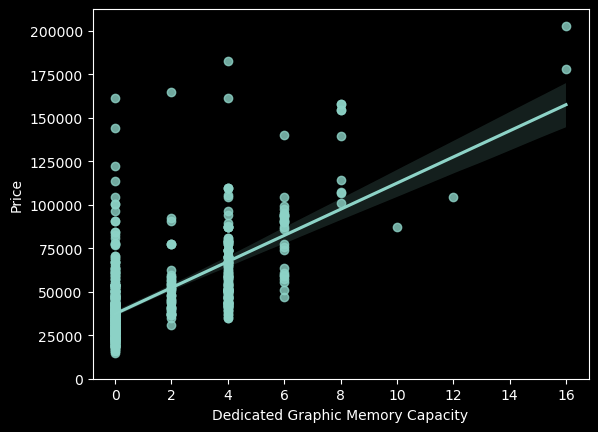

In [37]:
sns.regplot(x="Dedicated Graphic Memory Capacity", y="Price", data=dfc)
plt.ylim(0,)  

<h3>Analysis For SSD Capacity</h3>
SSD Capacity vs Price (0.717802 correlation)

(0.0, 212491.22876336)

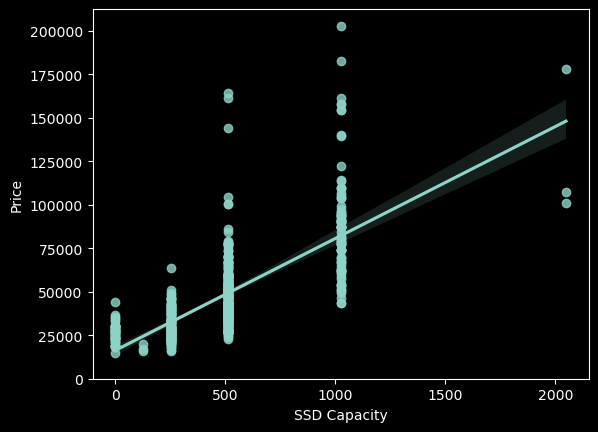

In [38]:
sns.regplot(x="SSD Capacity", y="Price", data=dfc)
plt.ylim(0,)  

<h3>Analysis For RAM</h3>
RAM vs Price (0.767396 correlation)

(0.0, 212410.049)

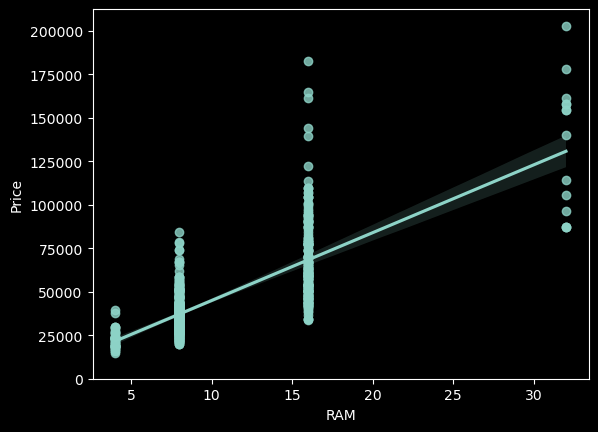

In [39]:
sns.regplot(x="RAM", y="Price", data=dfc)
plt.ylim(0,)  

<h3>Analysis For Clock Speed</h3>
Clock Speed vs Price (0.540215 correlation)

(0.0, 215257.90168830872)

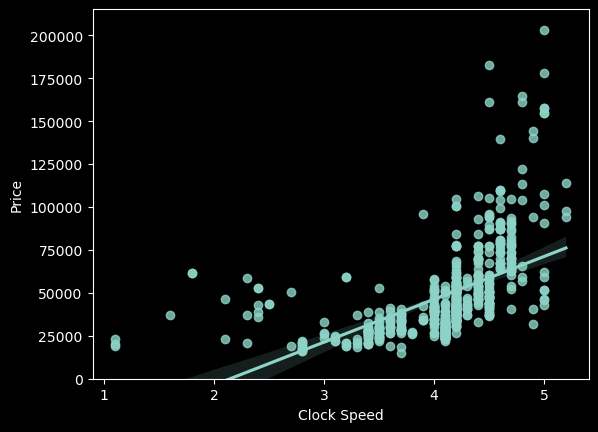

In [40]:
sns.regplot(x="Clock Speed", y="Price", data=dfc)
plt.ylim(0,)   

<h3>Analysis For Cache</h3>
Cache vs Price (0.689883 correlation)

(0.0, 212410.049)

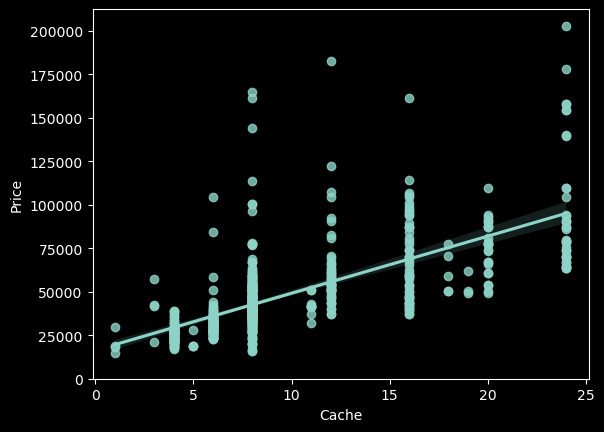

In [41]:
sns.regplot(x="Cache", y="Price", data=dfc)
plt.ylim(0,) 

<h3>Analysis For Number of Cores</h3>
Number of Cores vs Price (0.683547 correlation)

(0.0, 212410.049)

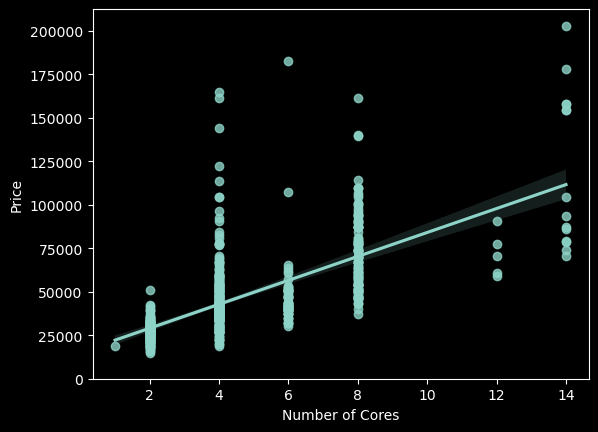

In [42]:
sns.regplot(x="Number of Cores", y="Price", data=dfc)
plt.ylim(0,) 

<h3>Analysis For Screen Size</h3>
Screen Size vs Price (0.038405 correlation)

(0.0, 212410.049)

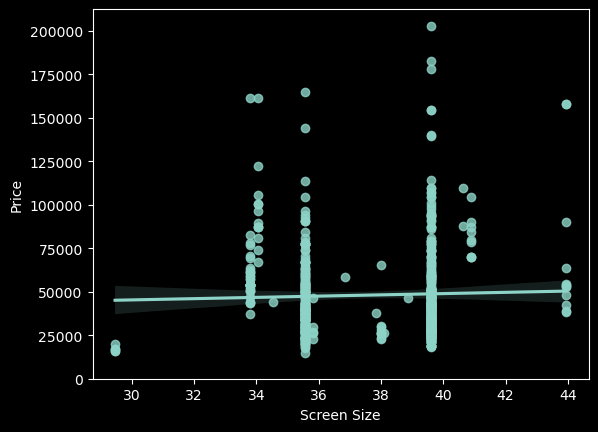

In [43]:
sns.regplot(x="Screen Size", y="Price", data=dfc)
plt.ylim(0,) 

<h3>Analysis For Screen Resolution</h3>
Relationship between <code>Screen Resolution</code> vs <code>Price</code> (0.501264 correlation)

(0.0, 212410.049)

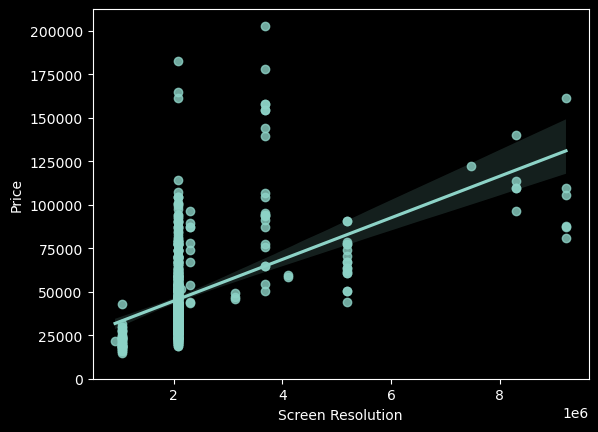

In [44]:
sns.regplot(x="Screen Resolution", y="Price", data=dfc)
plt.ylim(0,)  

<h3>Analysis For Wireless LAN</h3>
Wireless LAN vs Price (0.544019 correlation)

(0.0, 213078.13727810953)

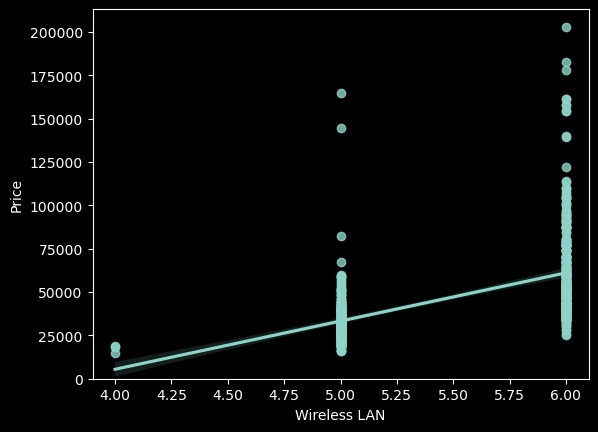

In [45]:
sns.regplot(x="Wireless LAN", y="Price", data=dfc)
plt.ylim(0,)  

<h3>Analysis For Bluetooth</h3>
Relationship between <code>Bluetooth</code> vs <code>Price</code> (0.374588 correlation)

(0.0, 212410.049)

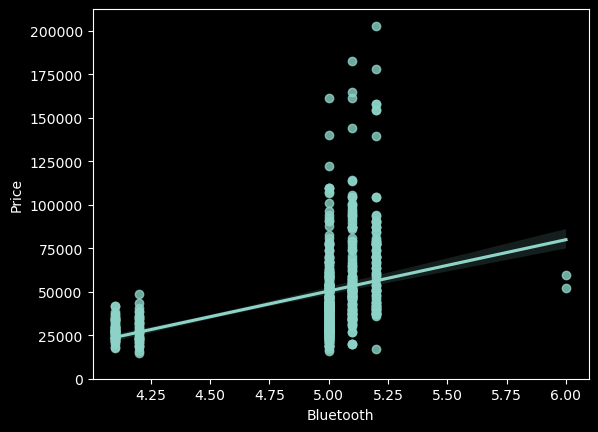

In [46]:
sns.regplot(x="Bluetooth", y="Price", data=dfc)
plt.ylim(0,)  

<h3>Analysis For Weight</h3>
Relationship between <code>Weight</code> vs <code>Price</code> (0.248729 correlation)

(0.0, 212410.049)

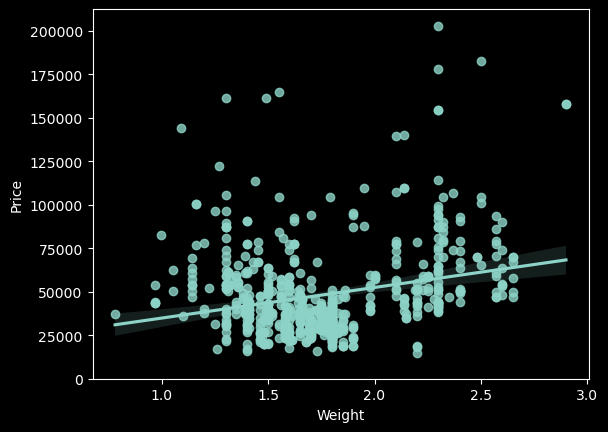

In [47]:
sns.regplot(x="Weight", y="Price", data=dfc)
plt.ylim(0,)  

<h3>Analysis For Web Camera</h3>
Relationship between <code>Web Camera</code> vs <code>Price</code> (0.154212 correlation)

(0.0, 212410.049)

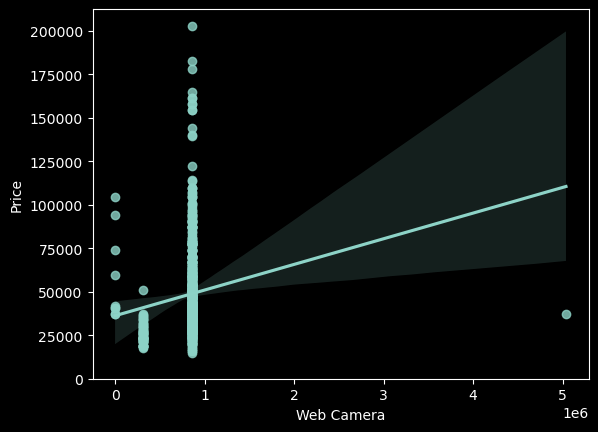

In [48]:
sns.regplot(x="Web Camera", y="Price", data=dfc)
plt.ylim(0,)  

<h3>Analysis For Brightness</h3>
Relationship between <code>Brightness</code> vs <code>Price</code> (0.307957 correlation)


(0.0, 212410.049)

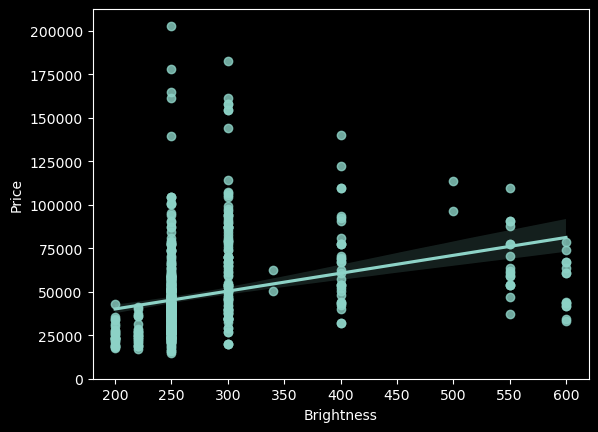

In [49]:
sns.regplot(x="Brightness", y="Price", data=dfc)
plt.ylim(0,)  

<h3>Analysis For Refresh Rate</h3>
Relationship between <code>Refresh Rate</code> vs <code>Price</code> (0.436344 correlation)

(0.0, 212410.049)

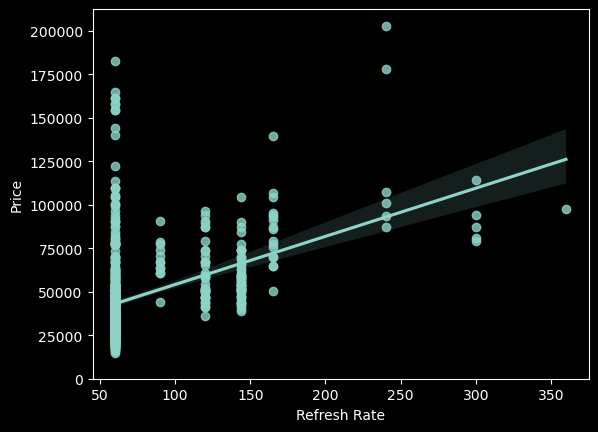

In [50]:
sns.regplot(x="Refresh Rate", y="Price", data=dfc)
plt.ylim(0,)  

<h3>Analysis For HDD Capacity</h3>
Relationship between <code>HDD Capacity</code> vs <code>Price</code> (-0.249298 correlation)

(0.0, 212410.049)

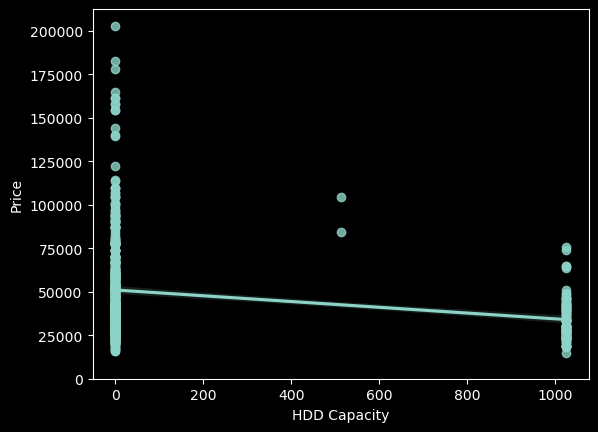

In [51]:
sns.regplot(x="HDD Capacity", y="Price", data=dfc)
plt.ylim(0,)  

<h2>Categorical Variables</h2>
The following plots show the relationship between the categorical variables and the continuous variable.

In [52]:
# list all the columns with datatype object
dfc.select_dtypes(include='object').columns

Index(['Model Number', 'Color', 'Type', 'Suitable For', 'MS Office Provided',
       'Processor Brand', 'Processor Name', 'RAM Type', 'Processor Variant',
       'Graphic Processor', 'Operating System', 'Touchscreen', 'Screen Type',
       'Dimensions', 'Keyboard Backlight', 'Warranty Summary', 'Brand'],
      dtype='object')

<h3>Analysis For Brand</h3>
Relationship between <code>Brand</code> and <code>Price</code>


<Axes: xlabel='Brand', ylabel='Price'>

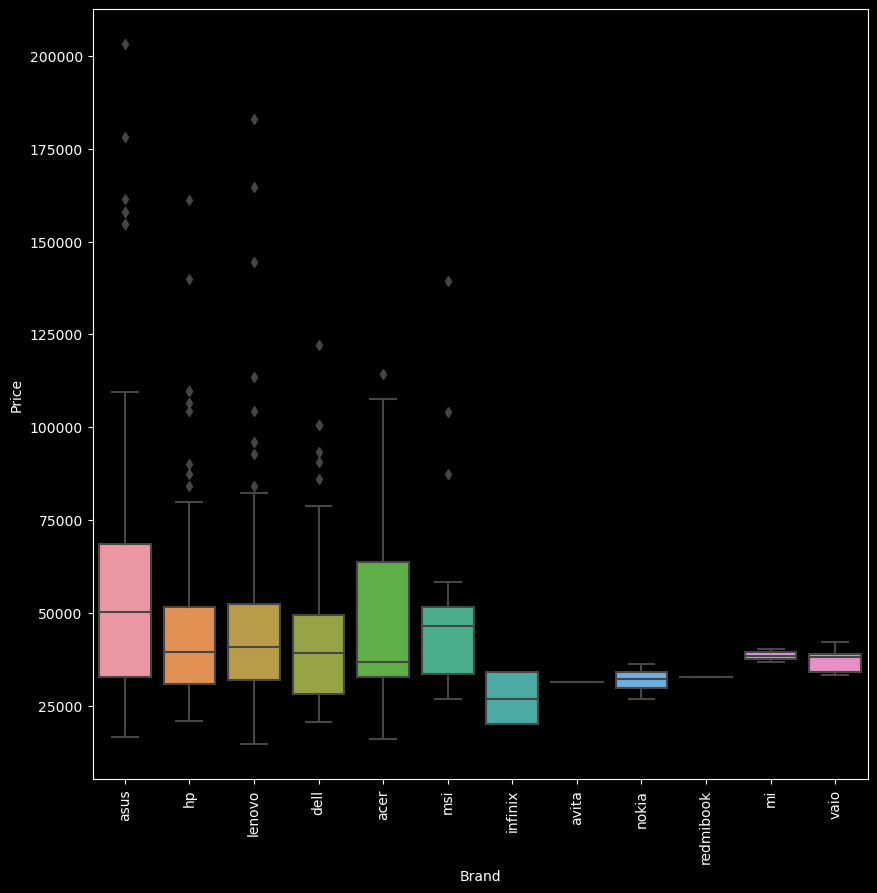

In [53]:
# make the width bigger
plt.figure(figsize=(10, 10))
# make the label horizontal
plt.xticks(rotation=90)

sns.boxplot(x="Brand", y="Price", data=dfc)

<h3>Analysis For Color</h3>
Relationship between <code>Color</code> and <code>Price</code>


<Axes: xlabel='Color', ylabel='Price'>

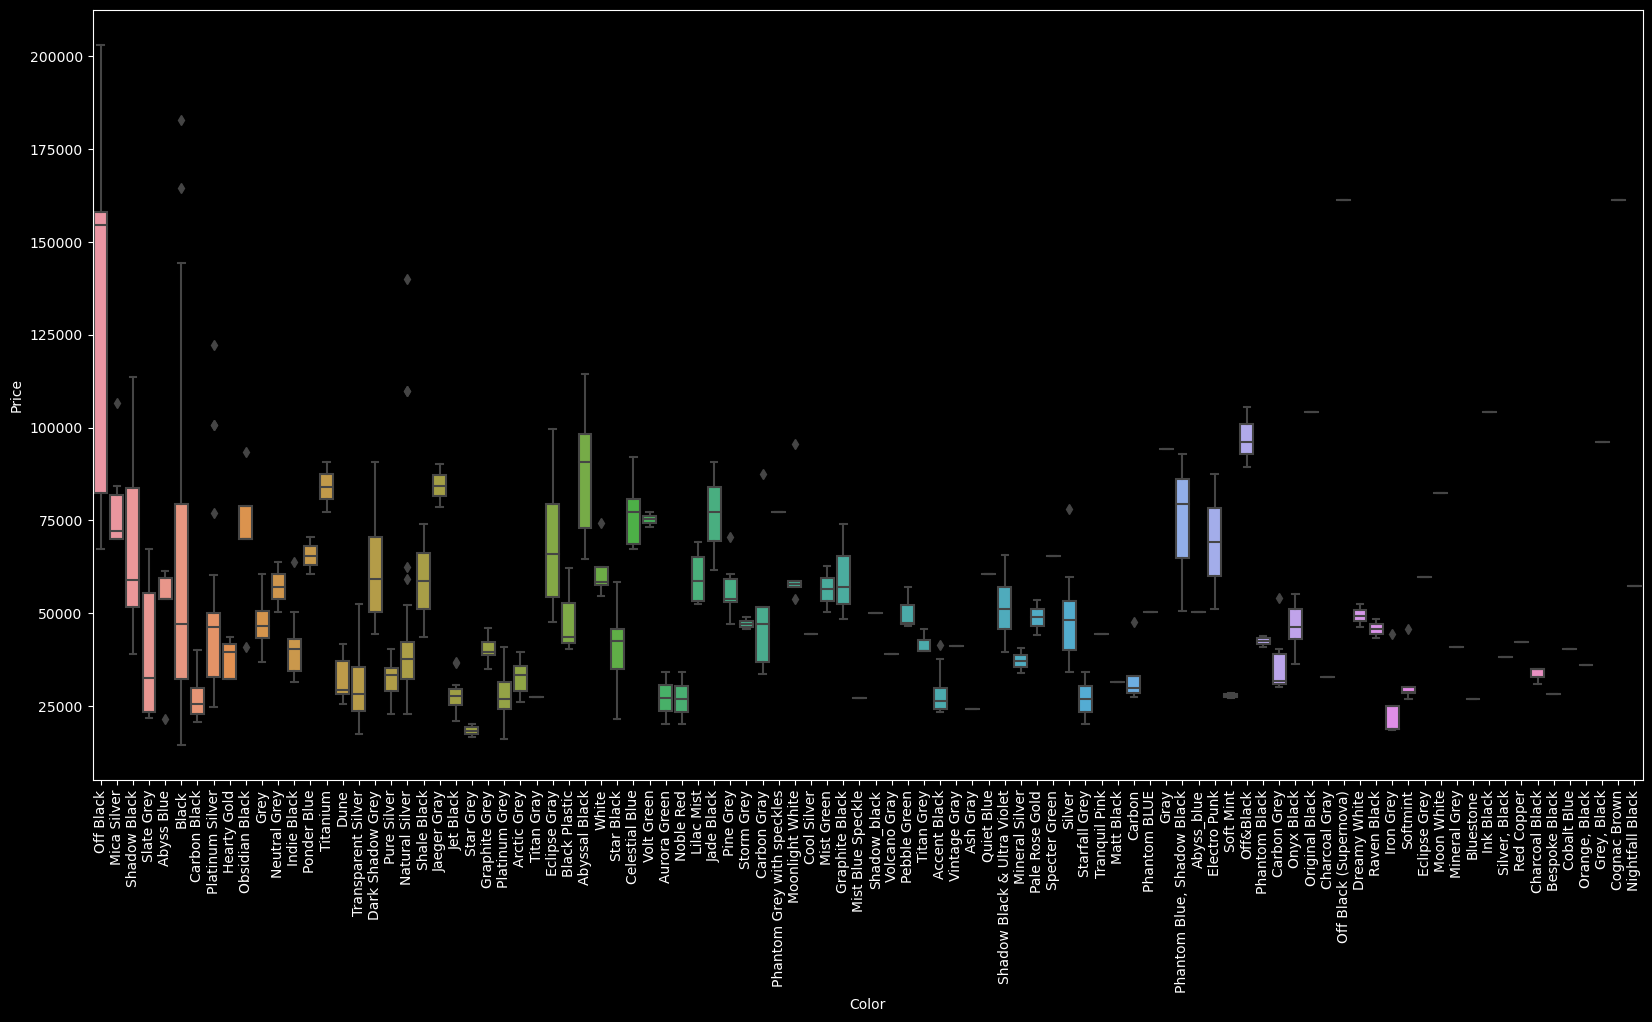

In [54]:
# make the width bigger
plt.figure(figsize=(20, 10))
# make the label horizontal
plt.xticks(rotation=90)
sns.boxplot(x="Color", y="Price", data=dfc)

<h3>Analysis For Type</h3>
Relationship between <code>Type</code> and <code>Price</code>


<Axes: xlabel='Type', ylabel='Price'>

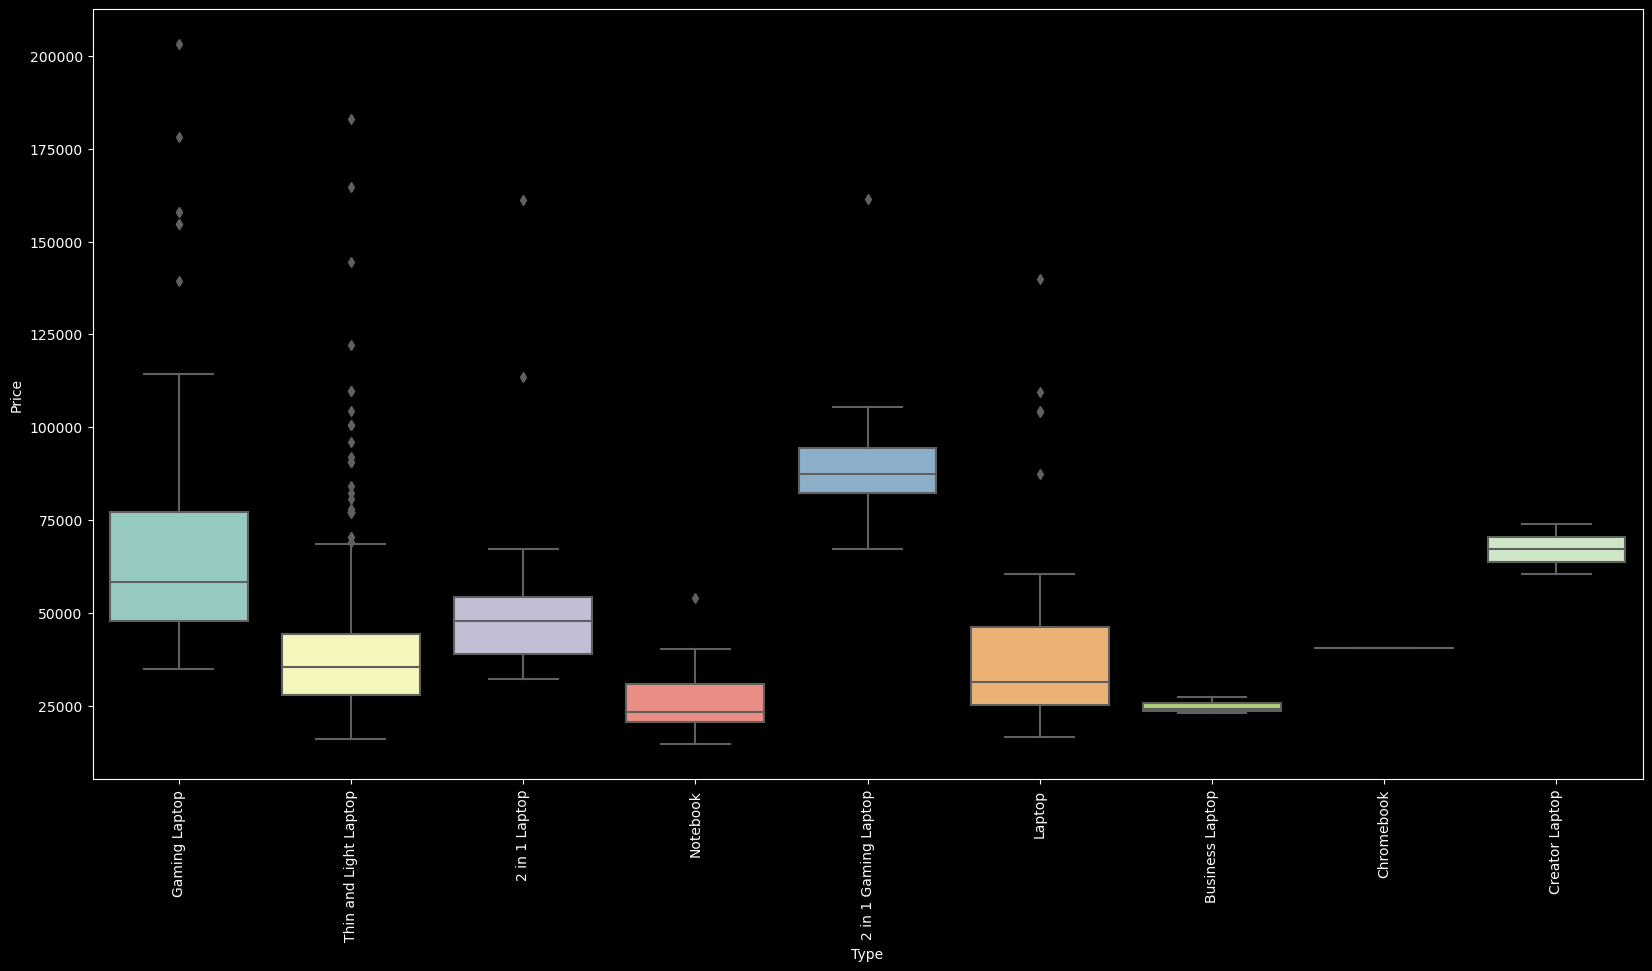

In [55]:
# make the width bigger
plt.figure(figsize=(20, 10))
# make the label horizontal
plt.xticks(rotation=90)

sns.boxplot(x="Type", y="Price", data=dfc)


<h3>Analysis For Suitable For</h3>
Relationship between <code>Suitable For</code> and <code>Price</code>


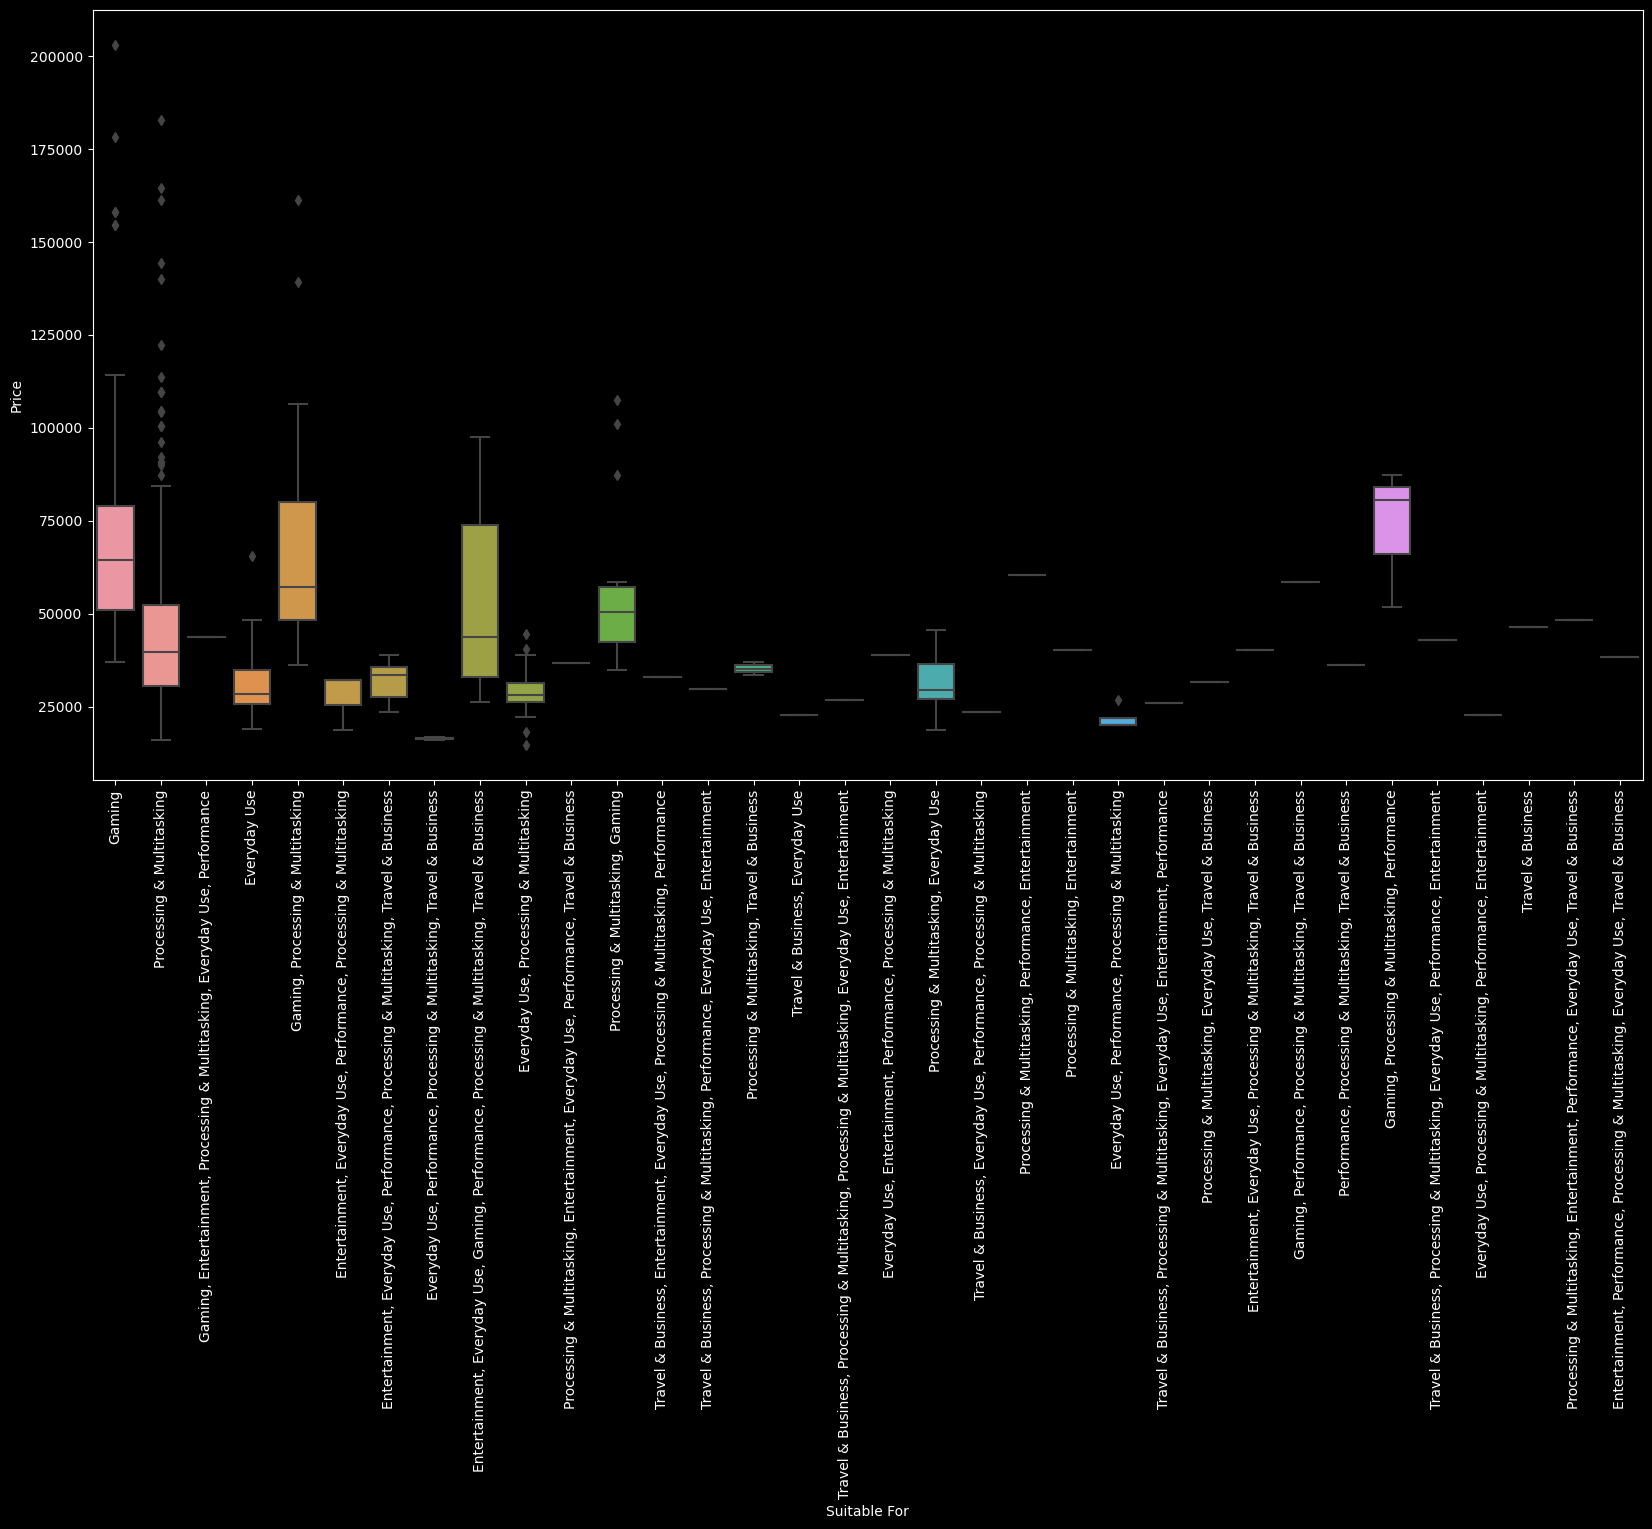

In [56]:
# make the width bigger
plt.figure(figsize=(20, 10))
# make the label horizontal
plt.xticks(rotation=90)

sns.boxplot(x="Suitable For", y="Price", data=dfc)
x = dfc['Suitable For'].value_counts()

<h3>Analysis For MS Office Provided</h3>
Relationship between <code>MS Office Provided</code> and <code>Price</code>


<Axes: xlabel='MS Office Provided', ylabel='Price'>

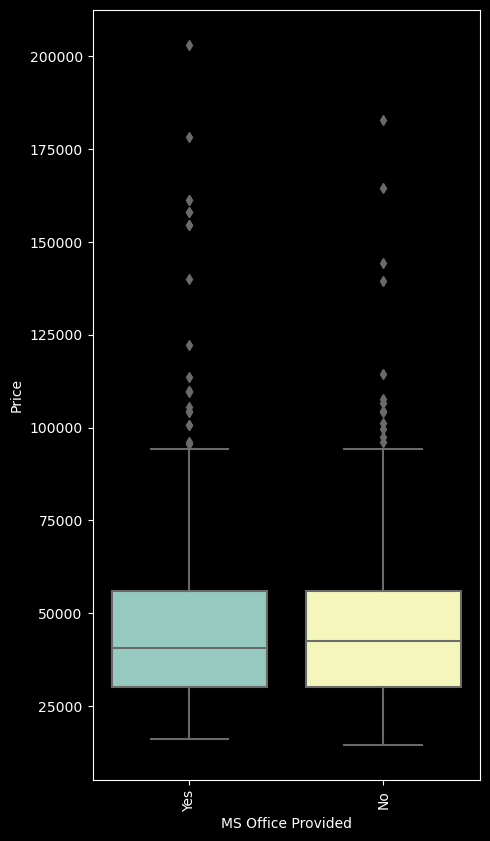

In [57]:
# make the width bigger
plt.figure(figsize=(5, 10))
# make the label horizontal
plt.xticks(rotation=90)

sns.boxplot(x="MS Office Provided", y="Price", data=dfc)

<h3>Analysis For Processor Brand</h3>
Relationship between <code>Processor Brand</code> and <code>Price</code>


<Axes: xlabel='Processor Brand', ylabel='Price'>

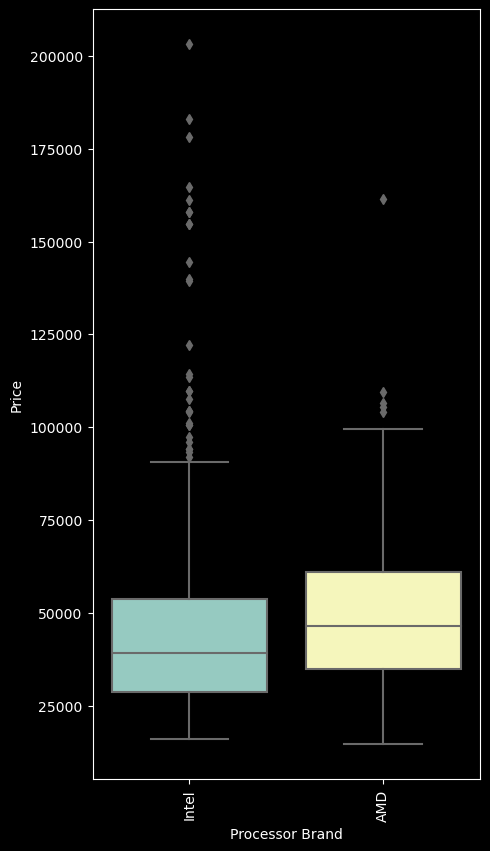

In [58]:
# make the width bigger
plt.figure(figsize=(5, 10))
# make the label horizontal
plt.xticks(rotation=90)

sns.boxplot(x="Processor Brand", y="Price", data=dfc)

<h3>Analysis For Processor Name</h3>
Relationship between <code>Processor Name</code> and <code>Price</code>


<Axes: xlabel='Processor Name', ylabel='Price'>

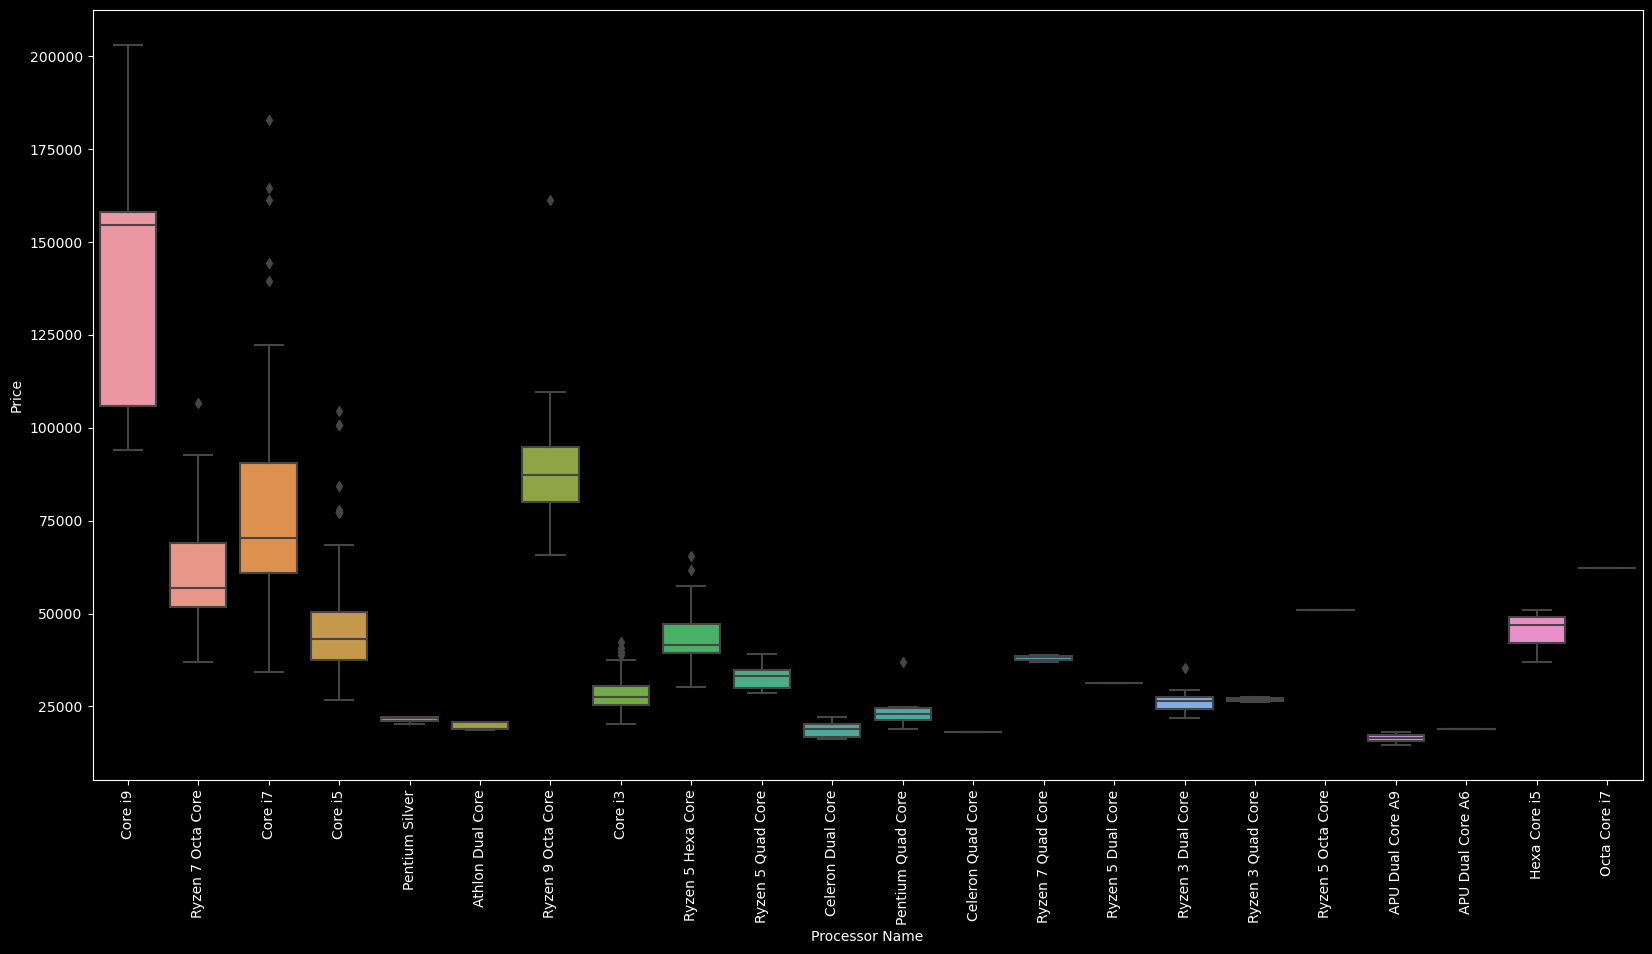

In [59]:
# make the width bigger
plt.figure(figsize=(20, 10))
# make the label horizontal
plt.xticks(rotation=90)

sns.boxplot(x="Processor Name", y="Price", data=dfc)

<h3>Analysis For RAM Type</h3>
Relationship between <code>RAM Type</code> and <code>Price</code>


<Axes: xlabel='RAM Type', ylabel='Price'>

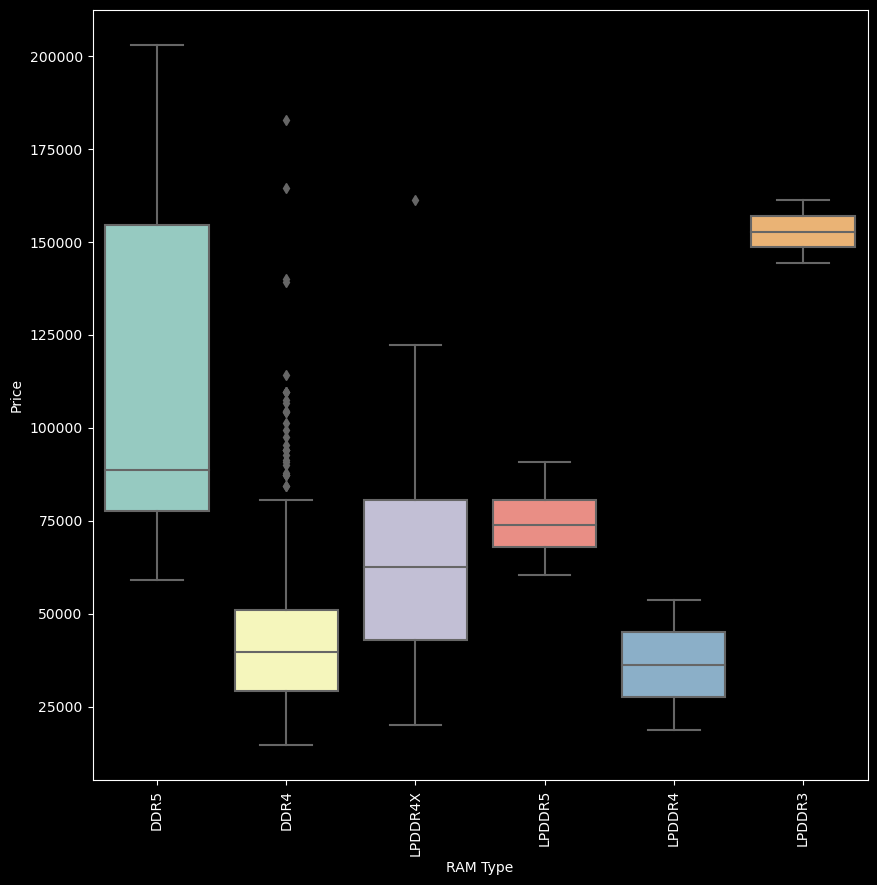

In [60]:
# make the width bigger
plt.figure(figsize=(10, 10))
# make the label horizontal
plt.xticks(rotation=90)

sns.boxplot(x="RAM Type", y="Price", data=dfc)

<h3>Analysis For Processor Variant</h3>
Relationship between <code>Processor Variant</code> and <code>Price</code>


<Axes: xlabel='Processor Variant', ylabel='Price'>

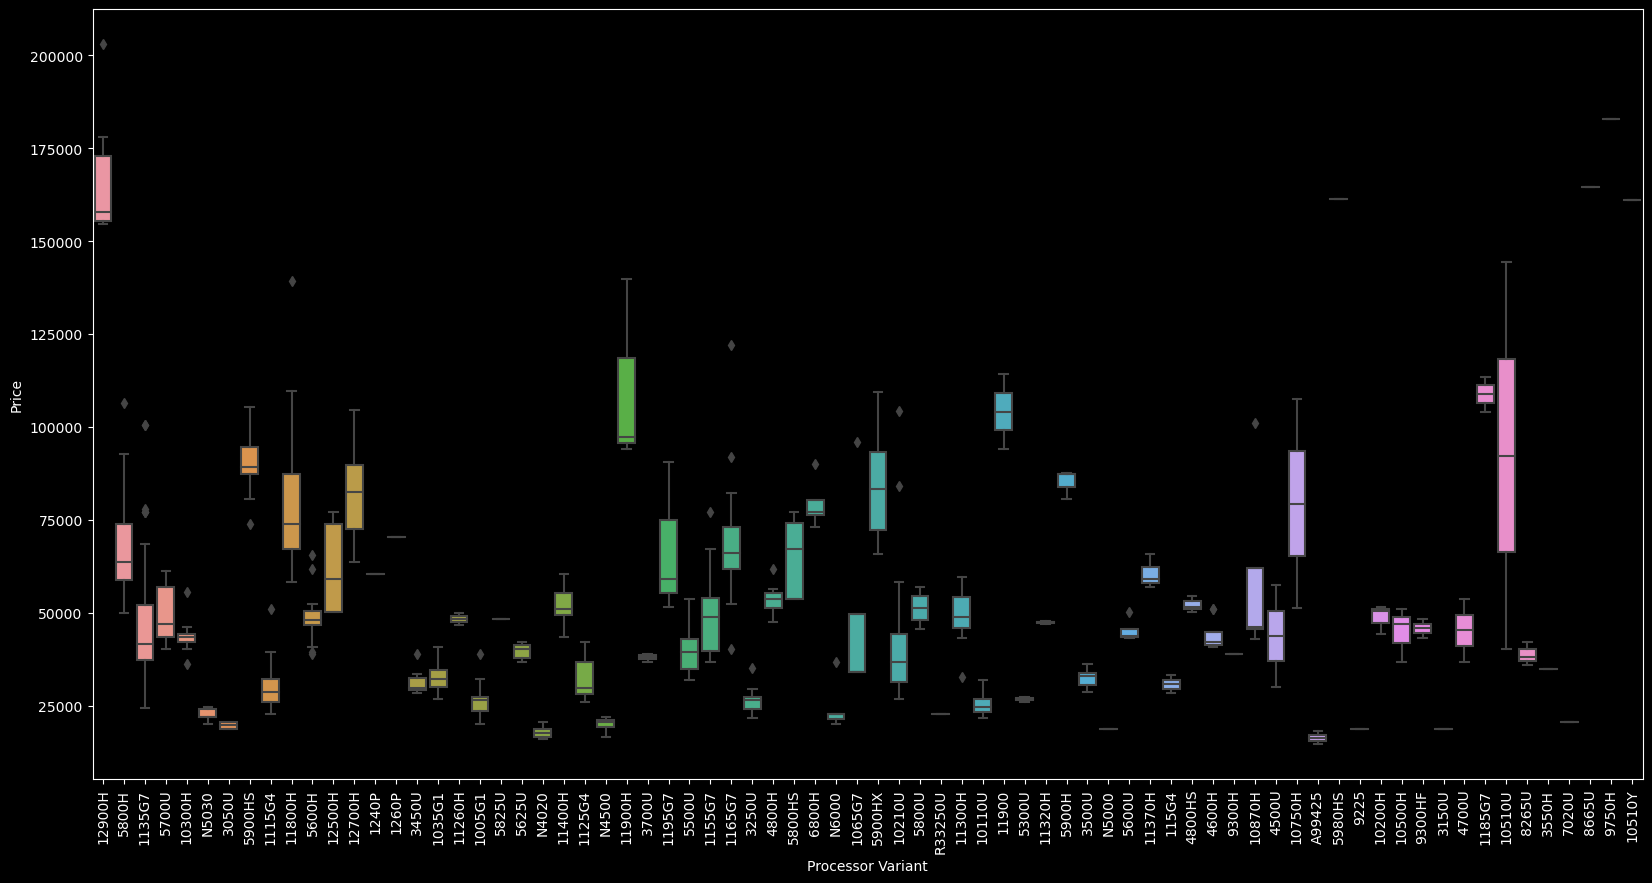

In [61]:
# make the width bigger
plt.figure(figsize=(20, 10))
# make the label horizontal
plt.xticks(rotation=90)

sns.boxplot(x="Processor Variant", y="Price", data=dfc)

<h3>Analysis For Graphic Processor</h3>
Relationship between <code>Graphic Processor</code> and <code>Price</code>


<Axes: xlabel='Graphic Processor', ylabel='Price'>

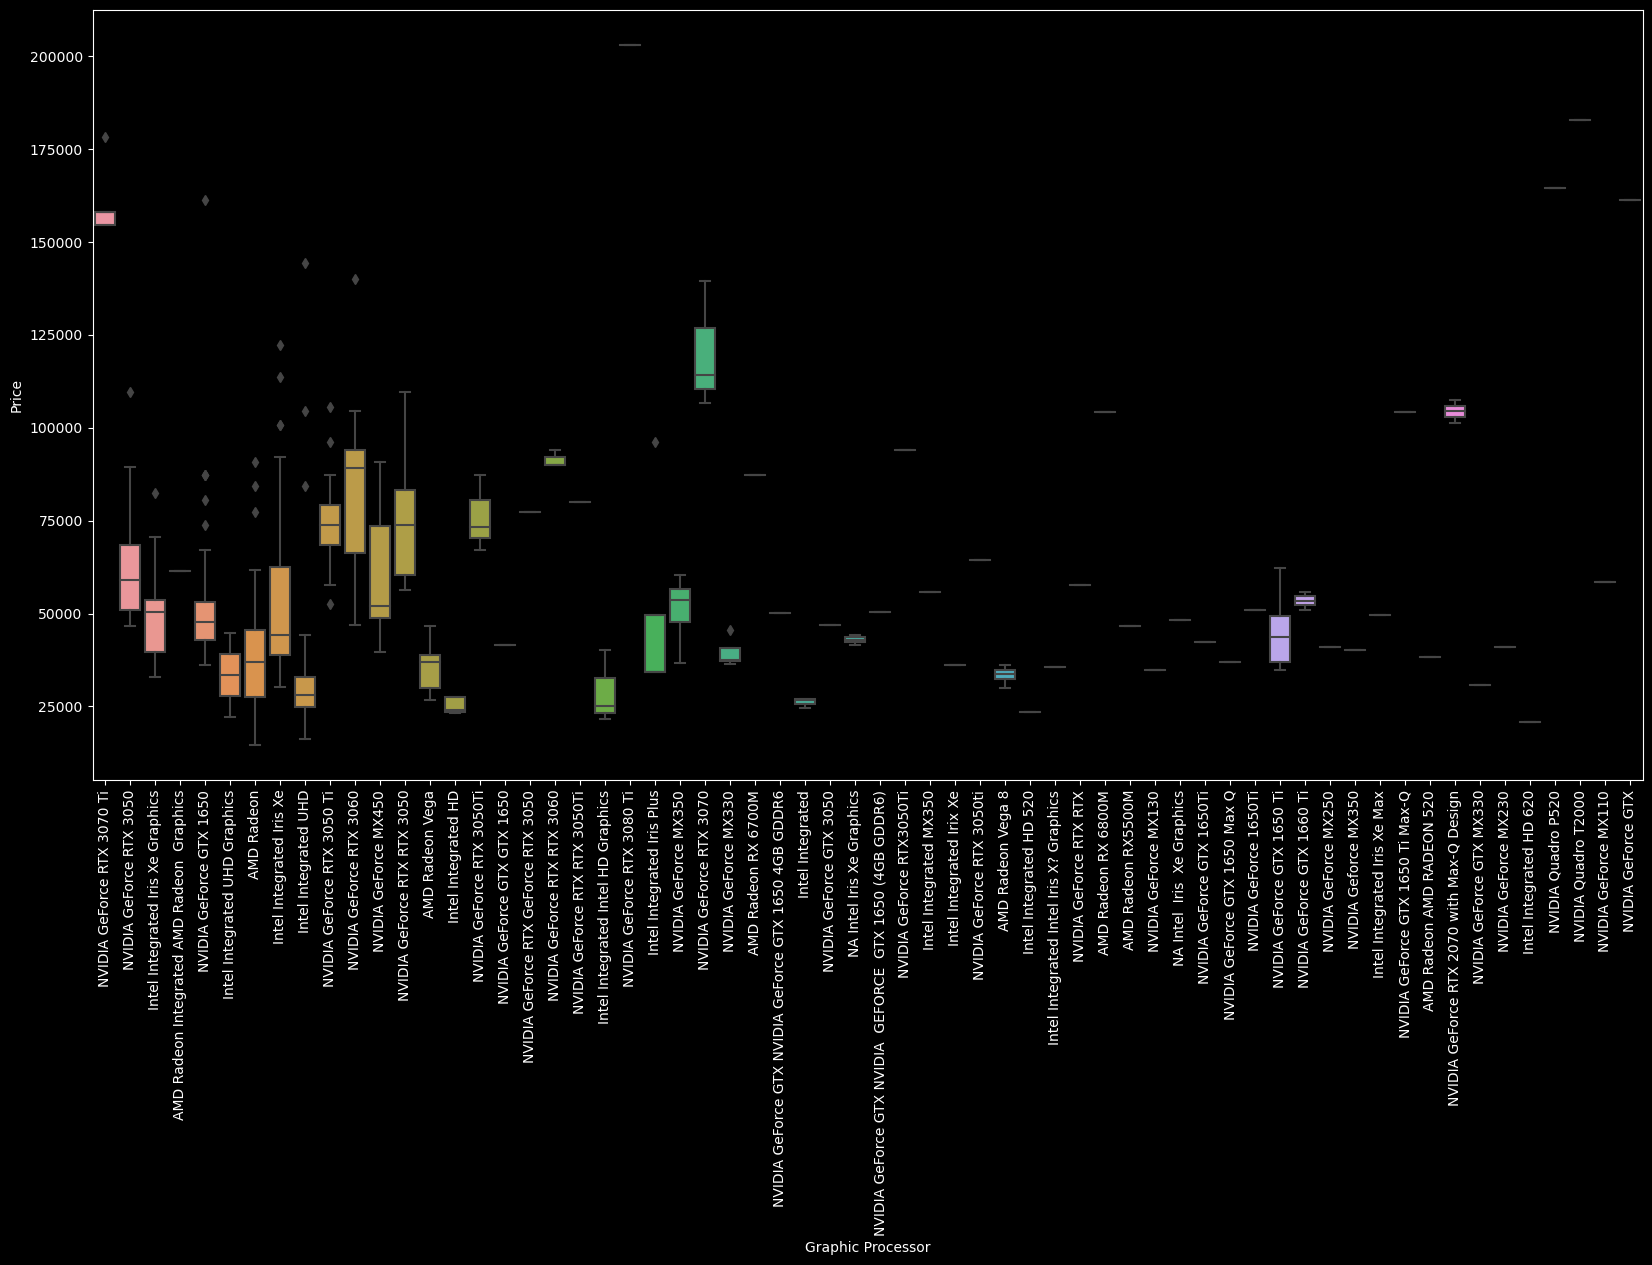

In [62]:
# make the width bigger
plt.figure(figsize=(20, 10))
# make the label horizontal
plt.xticks(rotation=90)

sns.boxplot(x="Graphic Processor", y="Price", data=dfc)

<h3>Analysis For Operating System</h3>
Relationship between <code>Operating System</code> and <code>Price</code>


<Axes: xlabel='Operating System', ylabel='Price'>

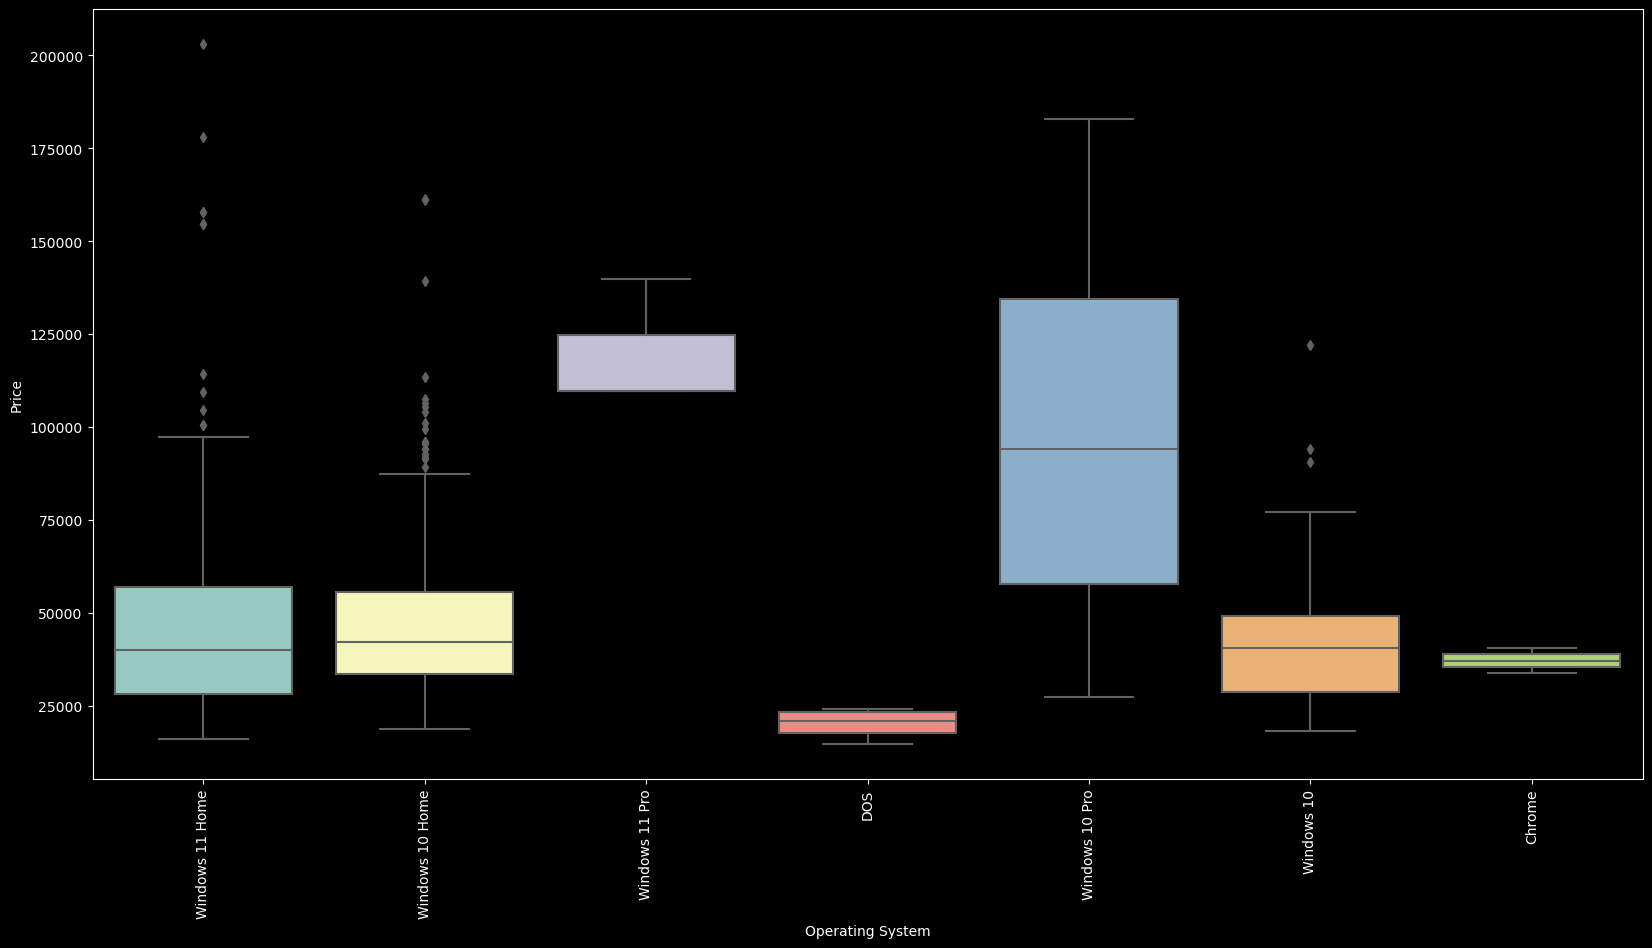

In [63]:
# make the width bigger
plt.figure(figsize=(20, 10))
# make the label horizontal
plt.xticks(rotation=90)

sns.boxplot(x="Operating System", y="Price", data=dfc)

<h3>Analysis For Touchscreen</h3>
Relationship between <code>Touchscreen</code> and <code>Price</code>


<Axes: xlabel='Touchscreen', ylabel='Price'>

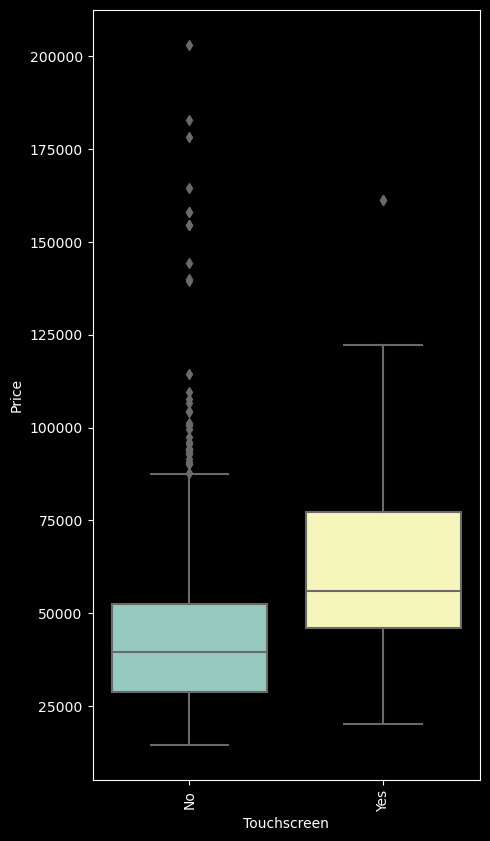

In [64]:
# make the width bigger
plt.figure(figsize=(5, 10))
# make the label horizontal
plt.xticks(rotation=90)

sns.boxplot(x="Touchscreen", y="Price", data=dfc)

<h3>Analysis For Screen Type</h3>
Relationship between <code>Screen Type</code> and <code>Price</code>


<Axes: xlabel='Screen Type', ylabel='Price'>

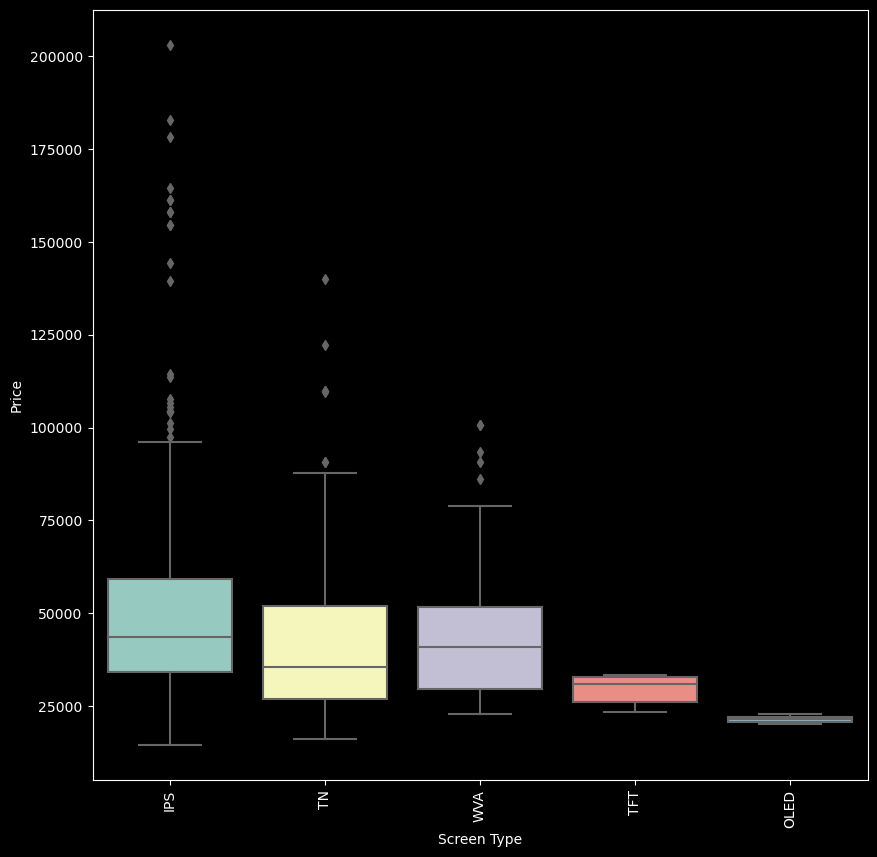

In [65]:
# make the width bigger
plt.figure(figsize=(10, 10))
# make the label horizontal
plt.xticks(rotation=90)

sns.boxplot(x="Screen Type", y="Price", data=dfc)

<h3>Analysis For Keyboard Backlight</h3>
Relationship between <code>Keyboard Backlight</code> and <code>Price</code>


<Axes: xlabel='Keyboard Backlight', ylabel='Price'>

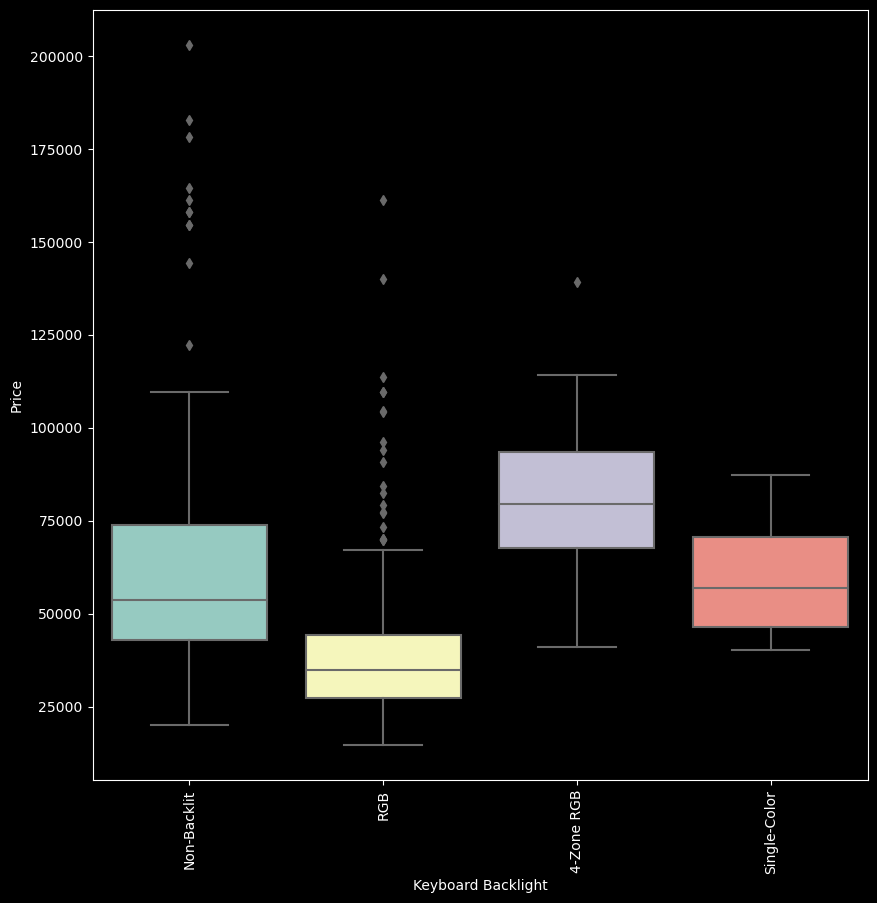

In [66]:
# make the width bigger
plt.figure(figsize=(10, 10))
# make the label horizontal
plt.xticks(rotation=90)

sns.boxplot(x="Keyboard Backlight", y="Price", data=dfc)

<h3>Analysis For Warranty Summary</h3>
Relationship between <code>Warranty Summary</code> and <code>Price</code>


<Axes: xlabel='Warranty Summary', ylabel='Price'>

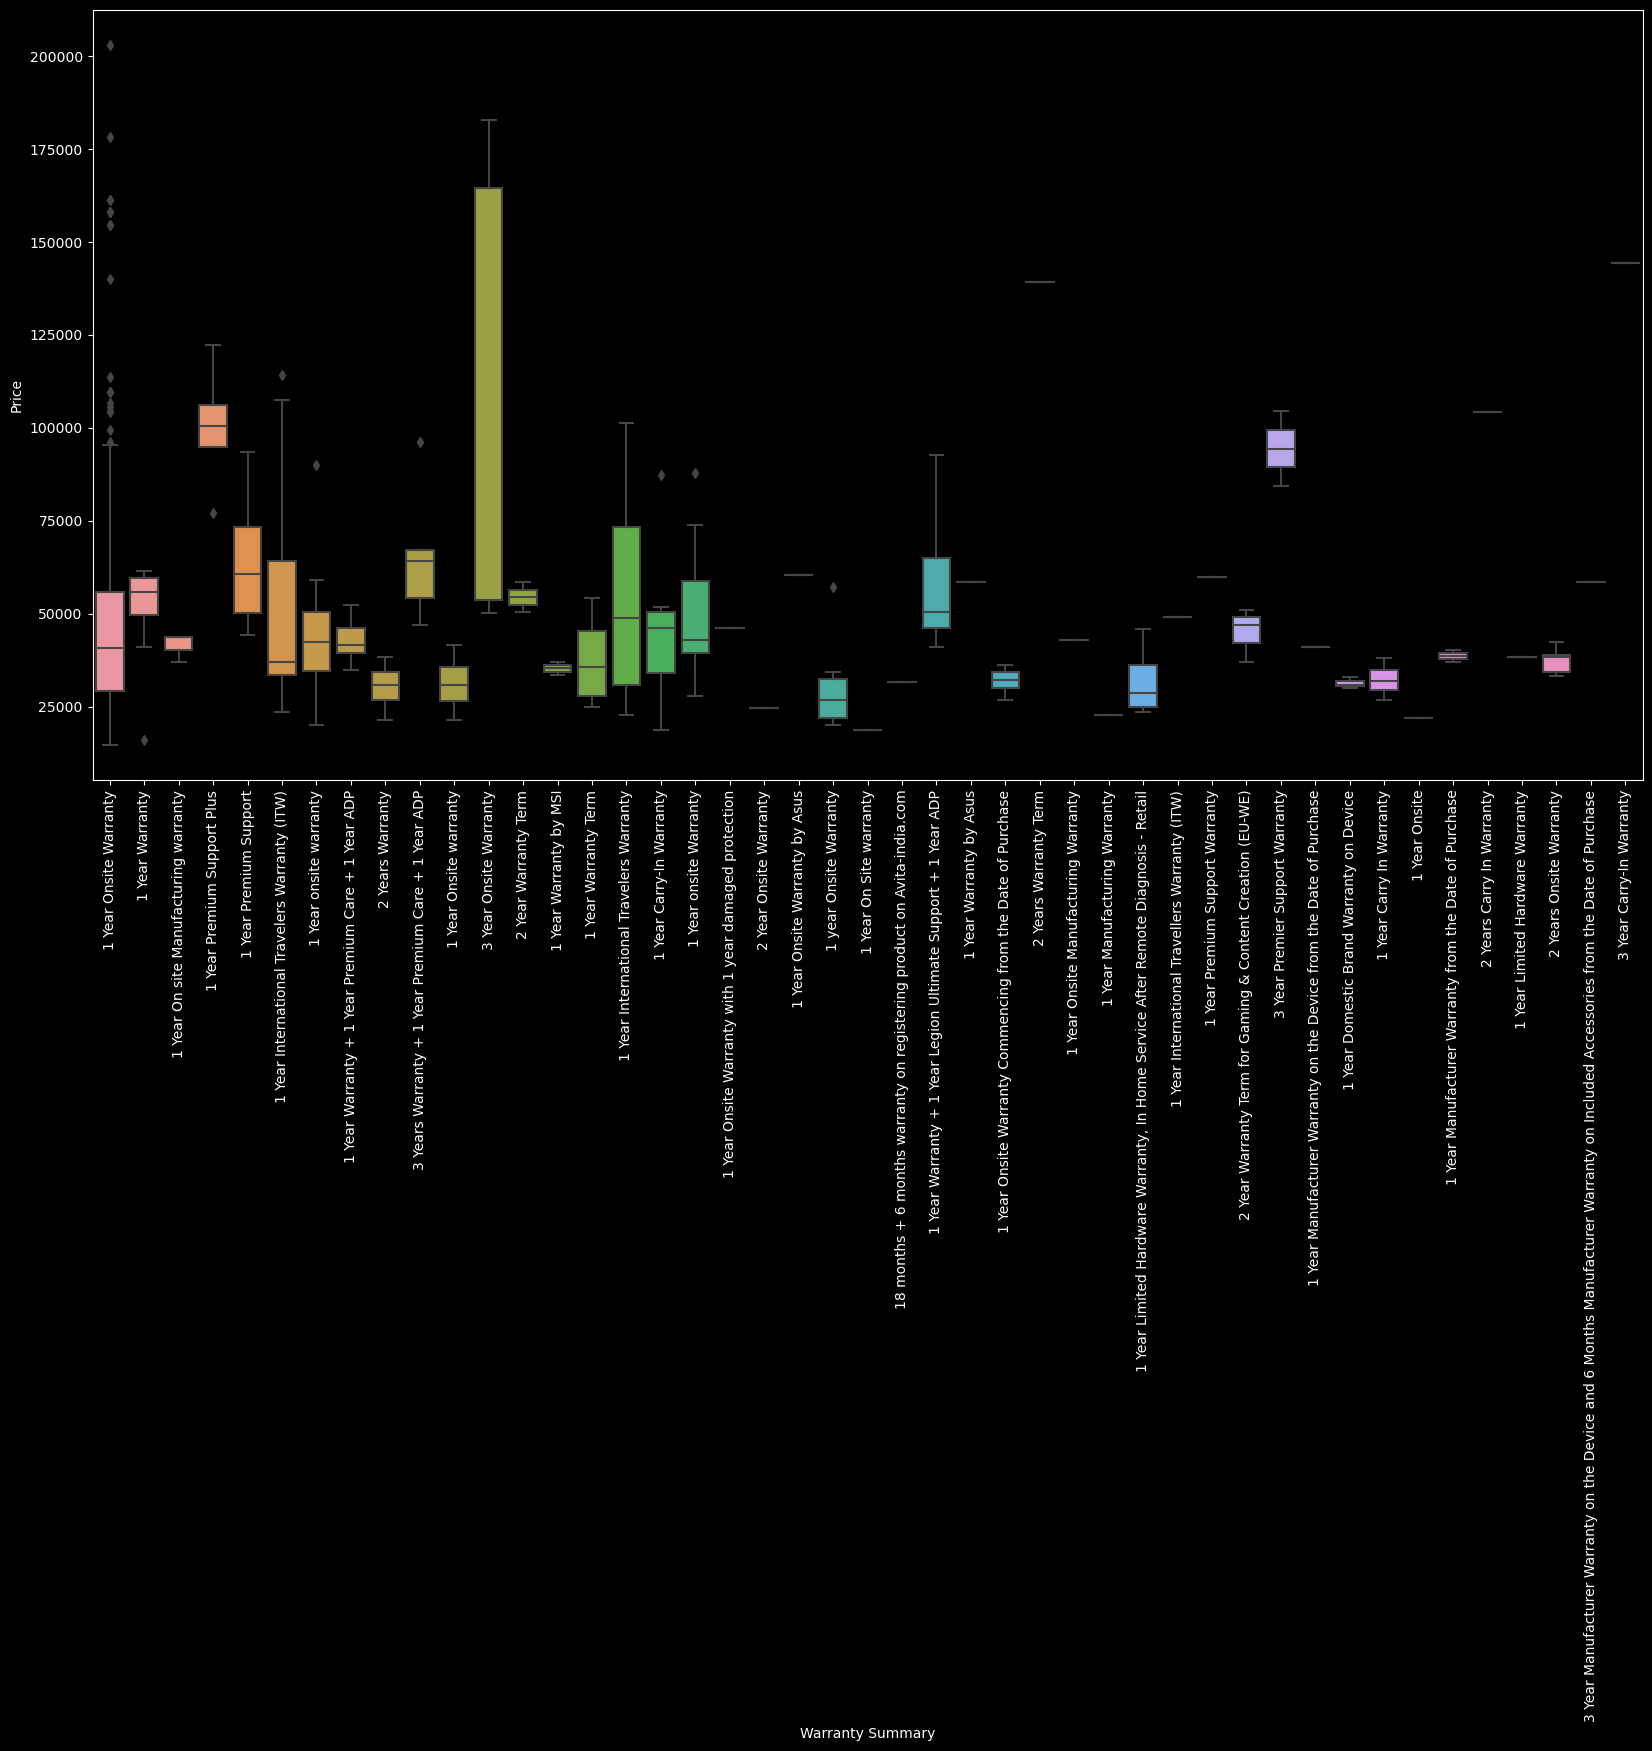

In [67]:
# make the width bigger
plt.figure(figsize=(20, 10))
# make the label horizontal
plt.xticks(rotation=90)

sns.boxplot(x="Warranty Summary", y="Price", data=dfc)

In [68]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 651 entries, 0 to 983
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Price                              651 non-null    float64
 1   Model Number                       651 non-null    object 
 2   Color                              651 non-null    object 
 3   Type                               651 non-null    object 
 4   Suitable For                       651 non-null    object 
 5   MS Office Provided                 651 non-null    object 
 6   Dedicated Graphic Memory Capacity  651 non-null    float64
 7   Processor Brand                    651 non-null    object 
 8   Processor Name                     651 non-null    object 
 9   SSD Capacity                       651 non-null    float64
 10  RAM                                651 non-null    float64
 11  RAM Type                           651 non-null    object 
 12 

<h1>Descriptive Statistical Analysis</h1>

Describe the statistical summary

In [69]:
dfc.describe()

,Price,Dedicated Graphic Memory Capacity,SSD Capacity,RAM,Clock Speed,Cache,Number of Cores,Screen Size,Screen Resolution,Wireless LAN,Bluetooth,Weight,Web Camera,Brightness,Refresh Rate,HDD Capacity
count,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,6.510000e+02,651.000000,651.000000,651.000000,6.510000e+02,651.000000,651.000000,651.000000
mean,48110.080538,1.443932,495.287250,10.807988,4.074962,9.691244,4.772657,37.759140,2.287539e+06,5.534562,4.923041,1.753404,8.071503e+05,278.233487,78.170507,174.599078
std,26153.862923,2.279913,291.015805,5.146918,0.571021,5.484375,2.587649,2.443168,1.089639e+06,0.508349,0.335798,0.369033,2.500629e+05,77.680495,41.040732,384.351639
min,14718.380000,0.000000,0.000000,4.000000,1.100000,1.000000,1.000000,29.460000,9.216000e+05,4.000000,4.100000,0.780000,0.000000e+00,200.000000,60.000000,0.000000
25%,30242.050000,0.000000,256.000000,8.000000,4.000000,6.000000,2.000000,35.560000,2.073600e+06,5.000000,5.000000,1.500000,8.640000e+05,250.000000,60.000000,0.000000
50%,40997.170000,0.000000,512.000000,8.000000,4.200000,8.000000,4.000000,39.620000,2.073600e+06,6.000000,5.000000,1.700000,8.640000e+05,250.000000,60.000000,0.000000
75%,56121.560000,4.000000,512.000000,16.000000,4.400000,12.000000,6.000000,39.620000,2.073600e+06,6.000000,5.100000,1.900000,8.640000e+05,300.000000,60.000000,0.000000
max,202996.160000,16.000000,2048.000000,32.000000,5.200000,24.000000,14.000000,43.940000,9.216000e+06,6.000000,6.000000,2.900000,5.038848e+06,600.000000,360.000000,1024.000000


In [70]:
dfc.describe(include=['object'])

,Model Number,Color,Type,Suitable For,MS Office Provided,Processor Brand,Processor Name,RAM Type,Processor Variant,Graphic Processor,Operating System,Touchscreen,Screen Type,Dimensions,Keyboard Backlight,Warranty Summary,Brand
count,651,651,651,651,651,651,651,651,651,651,651,651,651,651,651,651,651
unique,463,96,9,34,2,2,22,6,74,62,7,2,5,198,4,45,12
top,Vostro 3400,Natural Silver,Thin and Light Laptop,Processing & Multitasking,Yes,Intel,Core i5,DDR4,1135G7,Intel Integrated UHD,Windows 11 Home,No,IPS,360.20 x 234.90 x 19.90 mm,RGB,1 Year Onsite Warranty,asus
freq,17,55,359,360,479,452,202,560,108,182,291,557,400,24,411,415,209


<h1>ANOVA: Analysis of Variance</h1>

In [71]:
from scipy import stats

<h3>Color</h3>

In [72]:
x = []
for c in dfc['Color'].unique():
    x.append(dfc[['Color','Price']].groupby(['Color']).get_group(c)['Price'])

f_value, p_value = stats.f_oneway(*x)

print("ANOVA results: F:", f_value, ", P:", p_value)


ANOVA results: F: 8.311054963734552 , P: 2.1832463123628272e-61


<h3>Type</h3>

In [73]:
x = []
for t in dfc['Type'].unique():
    x.append(dfc[['Type','Price']].groupby(['Type']).get_group(t)['Price'])

f_value, p_value = stats.f_oneway(*x)

print("ANOVA results: F:", f_value, ", P:", p_value)


ANOVA results: F: 26.308493290245227 , P: 2.573133053756989e-35


<h3>Suitable For</h3>

In [74]:
x = []
for sf in dfc['Suitable For'].unique():
    x.append(dfc[['Suitable For','Price']].groupby(['Suitable For']).get_group(sf)['Price'])

f_value, p_value = stats.f_oneway(*x)

print("ANOVA results: F:", f_value, ", P:", p_value)


ANOVA results: F: 6.396036491155742 , P: 3.098461760407373e-23


<h3>MS Office Provided</h3>

In [75]:
x = []
for mop in dfc['MS Office Provided'].unique():
    x.append(dfc[['MS Office Provided','Price']].groupby(['MS Office Provided']).get_group(mop)['Price'])

f_value, p_value = stats.f_oneway(*x)

print("ANOVA results: F:", f_value, ", P:", p_value)


ANOVA results: F: 0.029526252948787628 , P: 0.8636231339005587


<h3>Processor Brand</h3>

In [76]:
x = []
for pb in dfc['Processor Brand'].unique():
    x.append(dfc[['Processor Brand','Price']].groupby(['Processor Brand']).get_group(pb)['Price'])

f_value, p_value = stats.f_oneway(*x)

print("ANOVA results: F:", f_value, ", P:", p_value)


ANOVA results: F: 3.6211887167454595 , P: 0.057490340532991464


<h3>Processor Name</h3>

In [77]:
x = []
for pn in dfc['Processor Name'].unique():
    x.append(dfc[['Processor Name','Price']].groupby(['Processor Name']).get_group(pn)['Price'])

f_value, p_value = stats.f_oneway(*x)

print("ANOVA results: F:", f_value, ", P:", p_value)


ANOVA results: F: 68.52523161844442 , P: 4.828866116604896e-147


<h3>RAM Type</h3>

In [78]:
x = []
for rt in dfc['RAM Type'].unique():
    x.append(dfc[['RAM Type','Price']].groupby(['RAM Type']).get_group(rt)['Price'])

f_value, p_value = stats.f_oneway(*x)

print("ANOVA results: F:", f_value, ", P:", p_value)


ANOVA results: F: 49.68215011259392 , P: 1.5208252270332532e-43


<h3>Processor Variant</h3>

In [79]:
x = []
for pv in dfc['Processor Variant'].unique():
    x.append(dfc[['Processor Variant','Price']].groupby(['Processor Variant']).get_group(pv)['Price'])

f_value, p_value = stats.f_oneway(*x)

print("ANOVA results: F:", f_value, ", P:", p_value)


ANOVA results: F: 39.56151815258419 , P: 1.1995853774646113e-180


<h3>Graphic Processor</h3>

In [80]:
x = []
for gp in dfc['Graphic Processor'].unique():
    x.append(dfc[['Graphic Processor','Price']].groupby(['Graphic Processor']).get_group(gp)['Price'])

f_value, p_value = stats.f_oneway(*x)

print("ANOVA results: F:", f_value, ", P:", p_value)


ANOVA results: F: 22.856688358667036 , P: 1.050989001123046e-118


<h3>Operating System</h3>

In [81]:
x = []
for opsys in dfc['Operating System'].unique():
    x.append(dfc[['Operating System','Price']].groupby(['Operating System']).get_group(opsys)['Price'])

f_value, p_value = stats.f_oneway(*x)

print("ANOVA results: F:", f_value, ", P:", p_value)


ANOVA results: F: 11.574351593556807 , P: 2.507057938326062e-12


<h3>Touchscreen</h3>

In [82]:
x = []
for ts in dfc['Touchscreen'].unique():
    x.append(dfc[['Touchscreen','Price']].groupby(['Touchscreen']).get_group(ts)['Price'])

f_value, p_value = stats.f_oneway(*x)

print("ANOVA results: F:", f_value, ", P:", p_value)


ANOVA results: F: 39.56266026566774 , P: 5.839813938688839e-10


<h3>Screen Type</h3>

In [83]:
x = []
for st in dfc['Screen Type'].unique():
    x.append(dfc[['Screen Type','Price']].groupby(['Screen Type']).get_group(st)['Price'])

f_value, p_value = stats.f_oneway(*x)

print("ANOVA results: F:", f_value, ", P:", p_value)


ANOVA results: F: 6.041515668263182 , P: 8.916132006845675e-05


<h3>Keyboard Backlight</h3>

In [84]:
x = []
for kb in dfc['Keyboard Backlight'].unique():
    x.append(dfc[['Keyboard Backlight','Price']].groupby(['Keyboard Backlight']).get_group(kb)['Price'])

f_value, p_value = stats.f_oneway(*x)

print("ANOVA results: F:", f_value, ", P:", p_value)


ANOVA results: F: 73.6963261732375 , P: 5.186139317365579e-41


<h3>Warranty Summary</h3>

In [85]:
x = []
for ws in dfc['Warranty Summary'].unique():
    x.append(dfc[['Warranty Summary','Price']].groupby(['Warranty Summary']).get_group(ws)['Price'])

f_value, p_value = stats.f_oneway(*x)

print("ANOVA results: F:", f_value, ", P:", p_value)


ANOVA results: F: 2.9755733172460217 , P: 2.4534819153466334e-09


<h1>Saving the Cleaned Dataset</h1>


In [86]:
dfc.to_csv('Group 11_Dataset.csv', index=False)